In [1]:
"""Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df
"""

'Perform Principal component analysis and perform clustering using first \n3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain \noptimum number of clusters and check whether we have obtained same number of clusters with the original data \n(class column we have ignored at the begining who shows it has 3 clusters)df\n'

In [2]:
import pandas as pd
df = pd.read_csv("D:/EXCELR/Assignments/wine.csv")
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
df.shape

(178, 14)

In [4]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [6]:
df[df.duplicated()]
df.columns.duplicated()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [51]:
df.isna()
df.isna().sum()


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [52]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

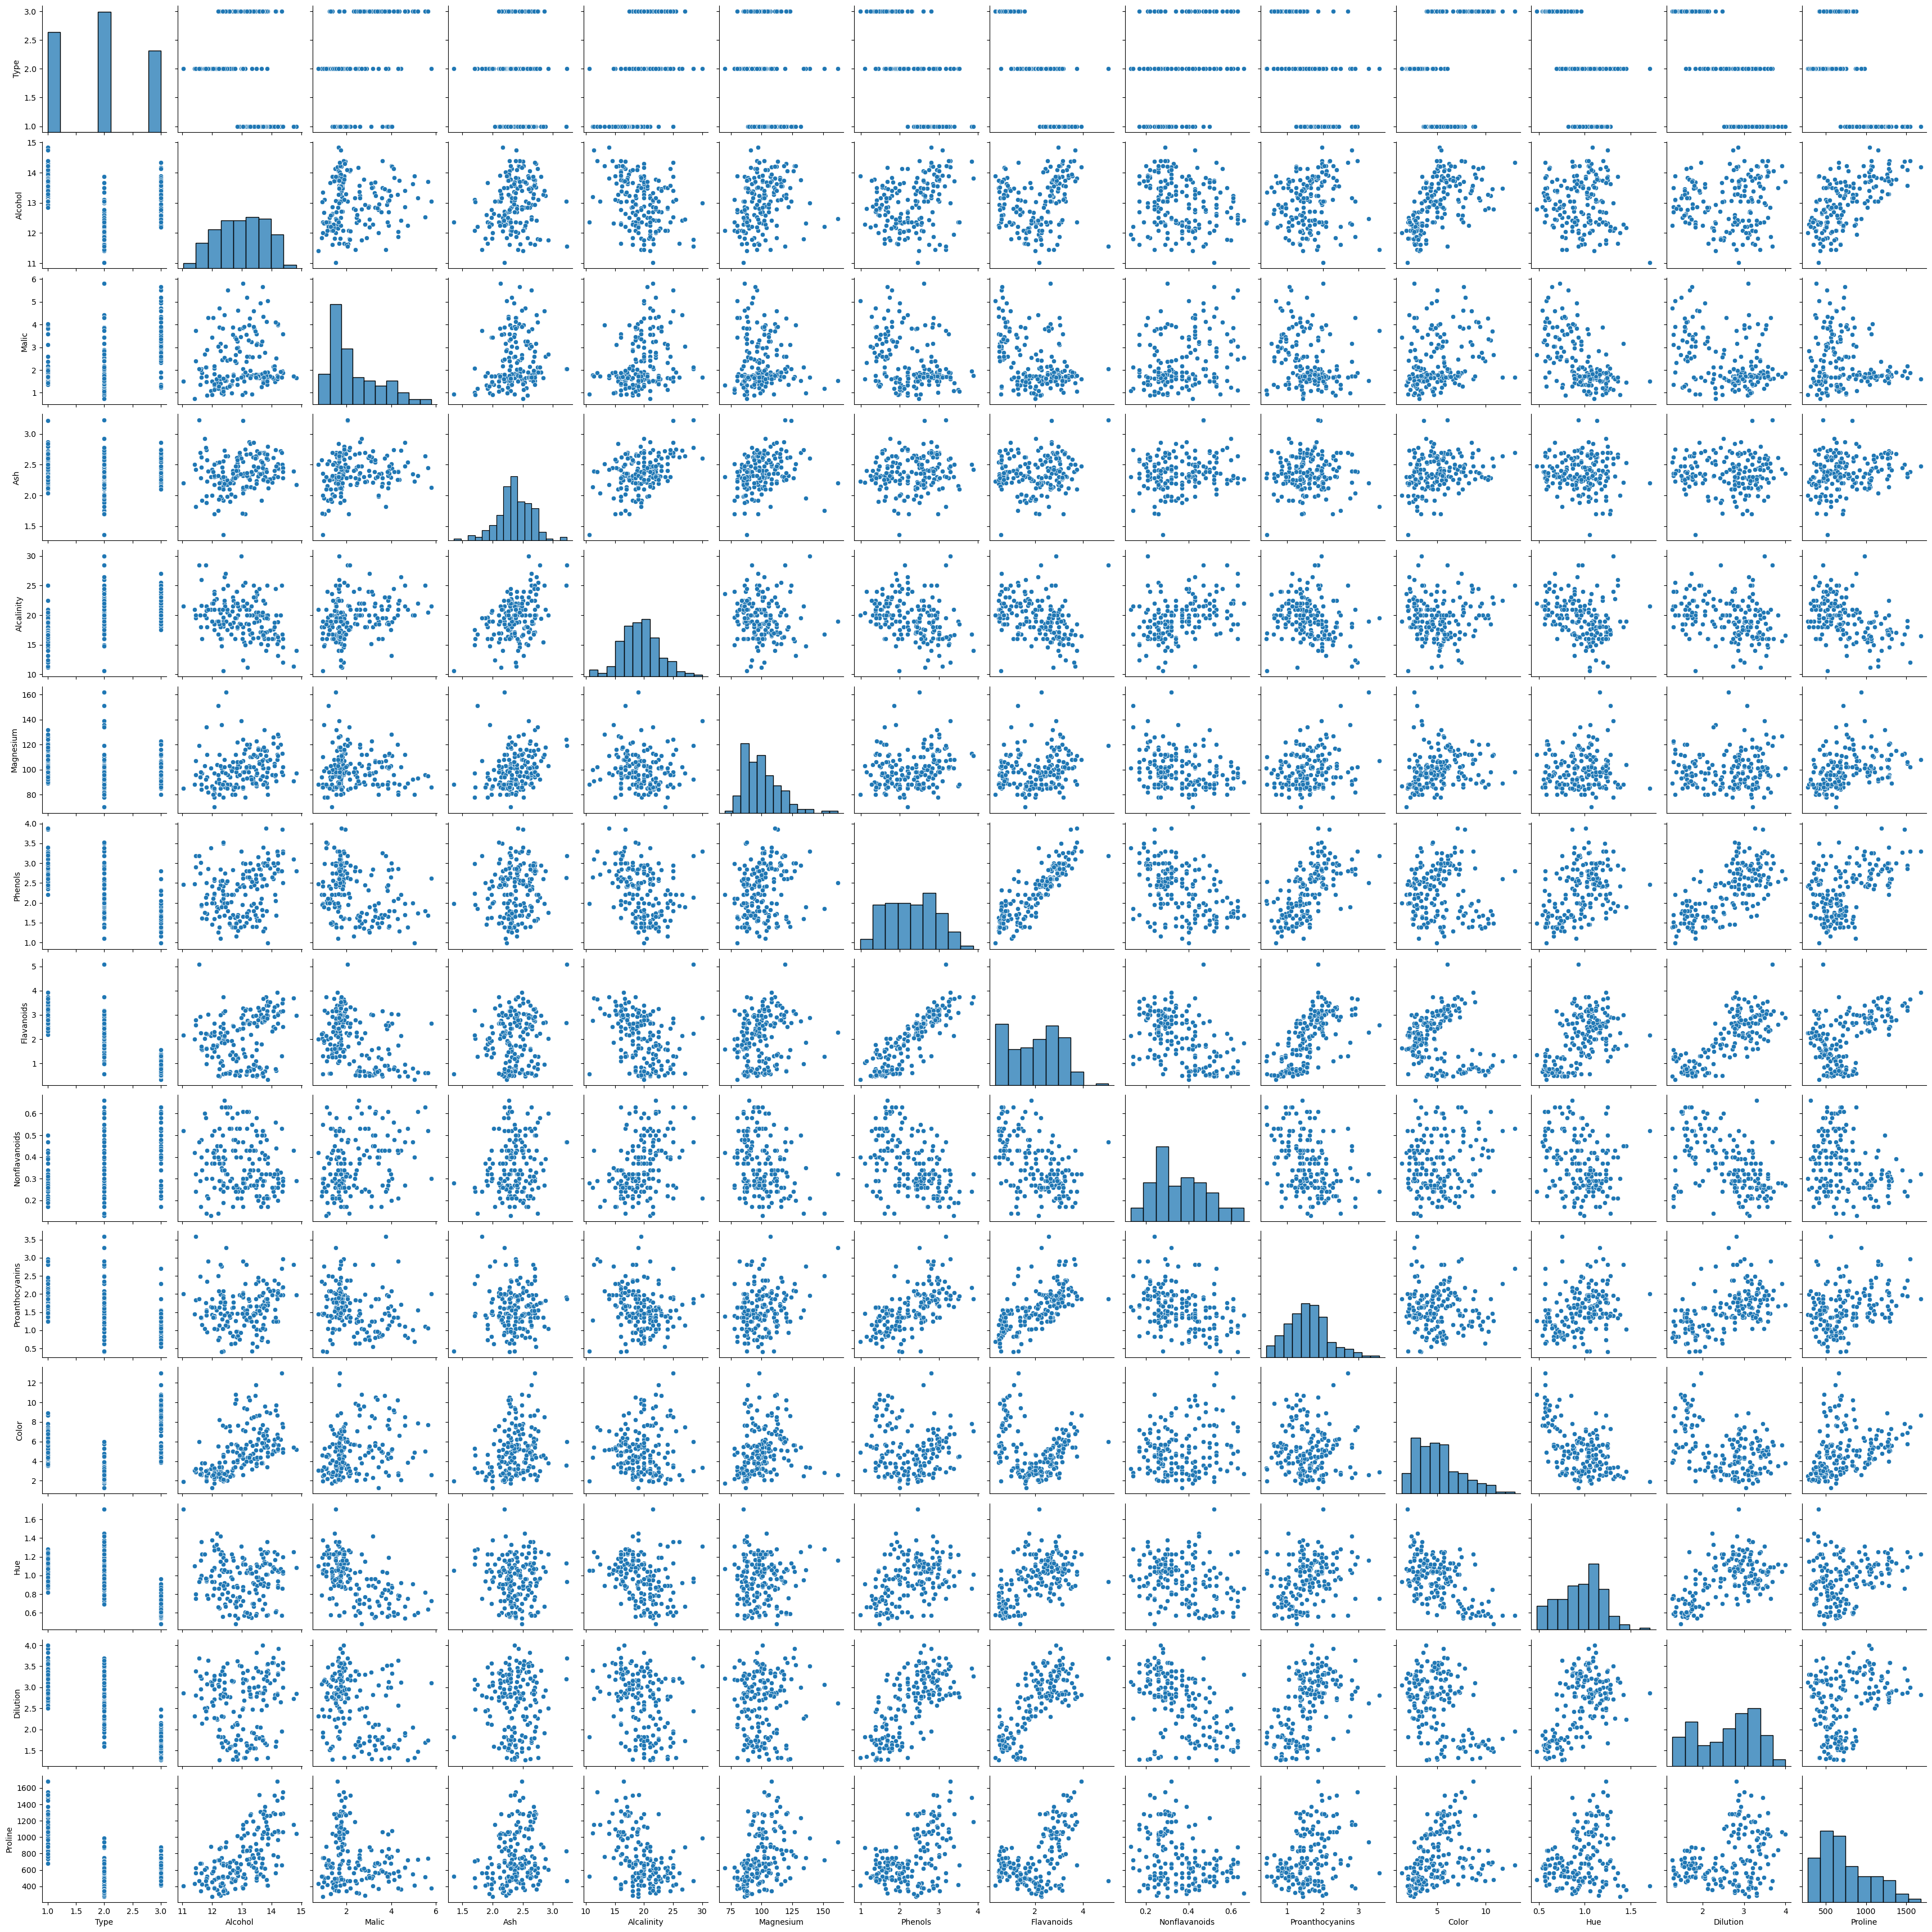

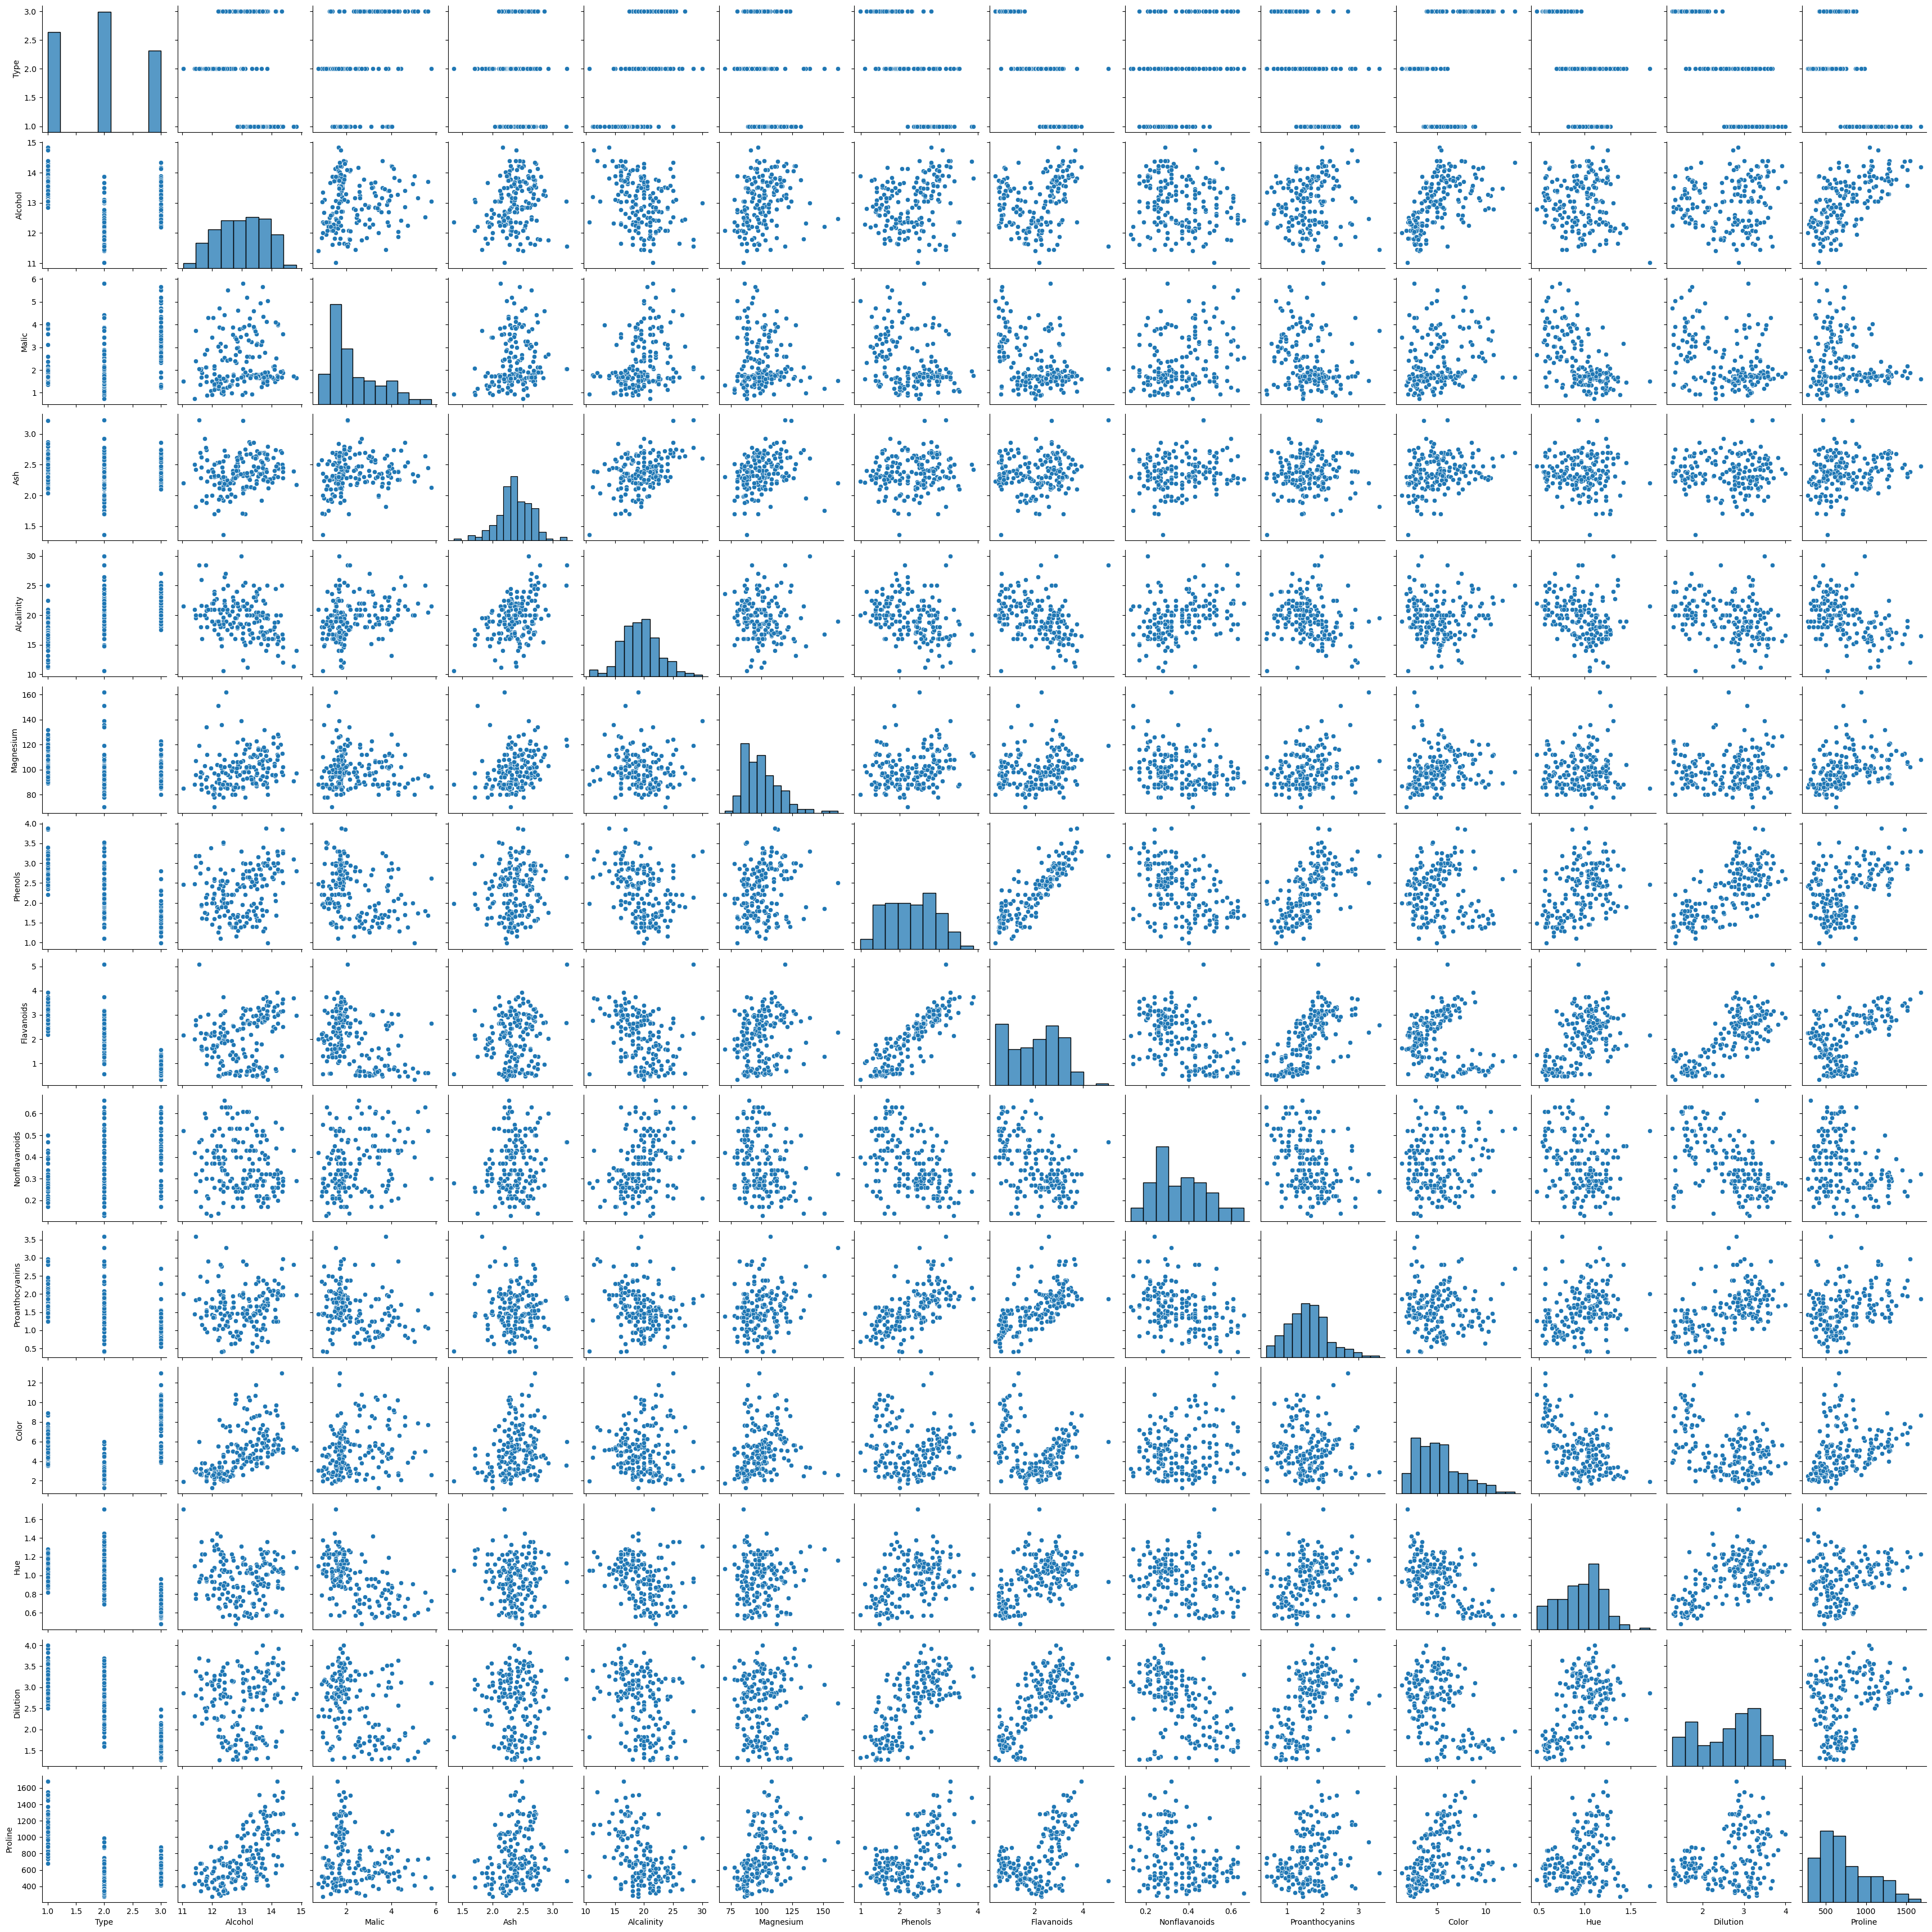

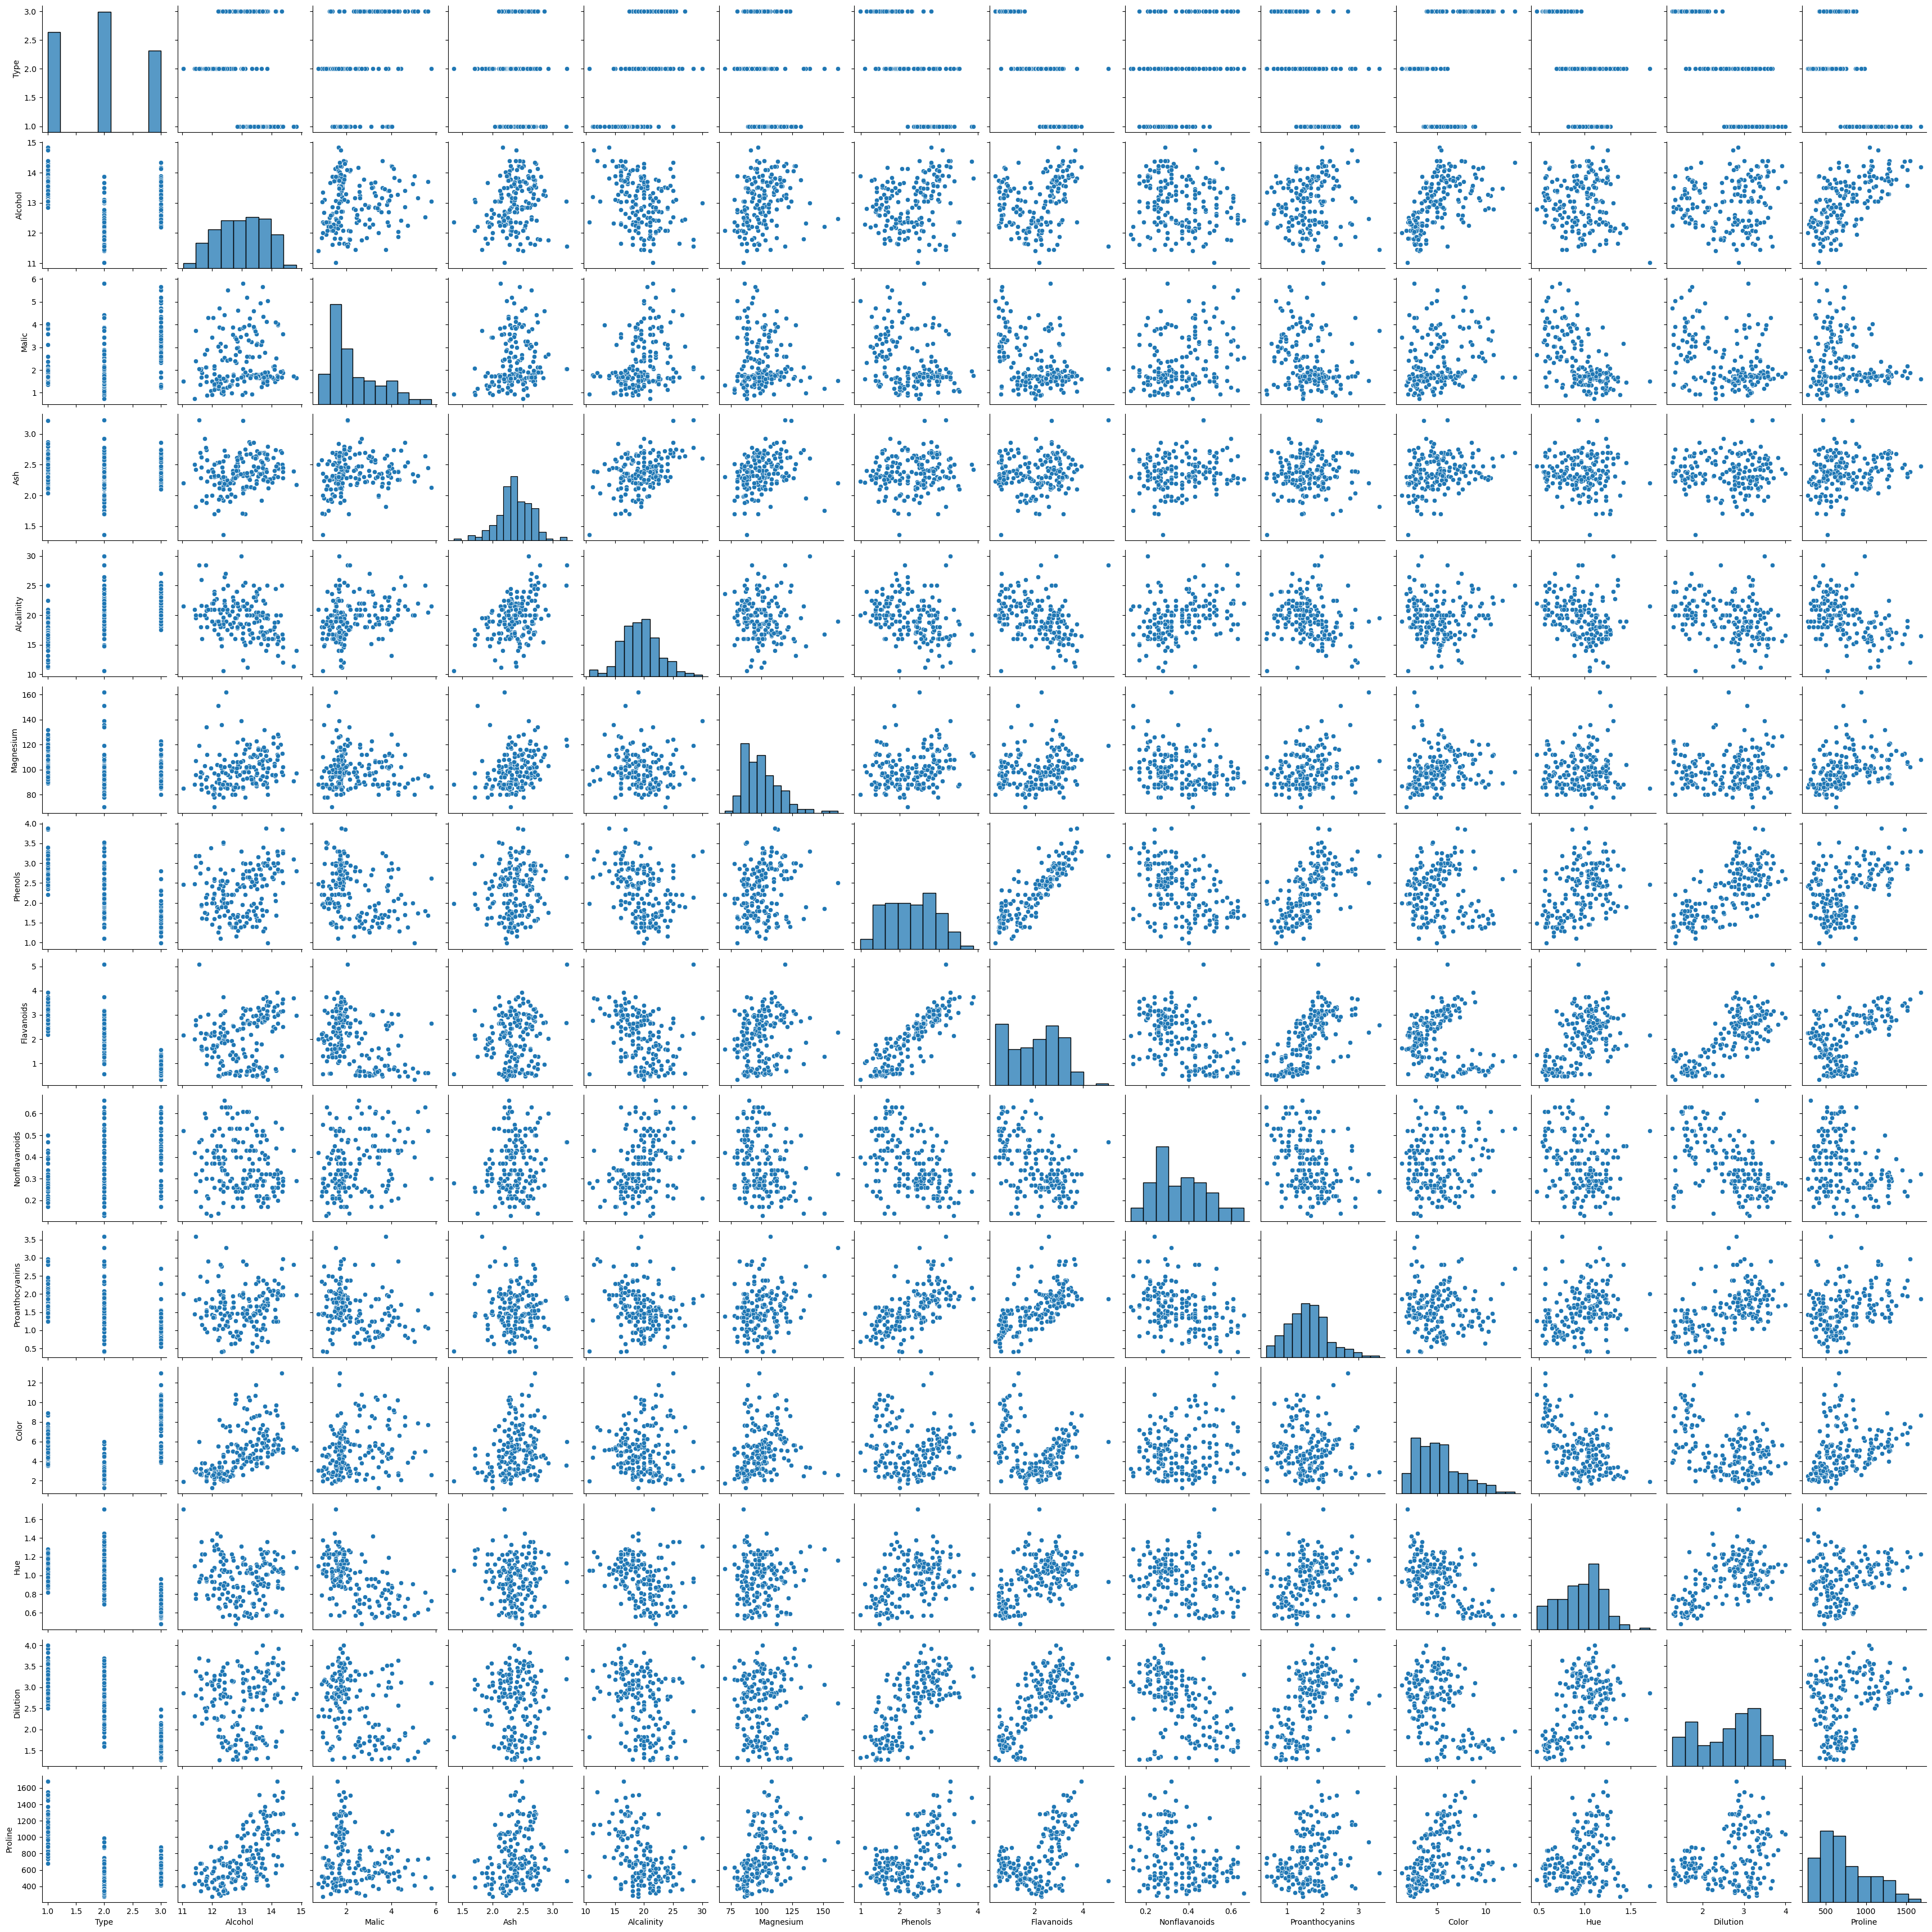

In [55]:
import seaborn as sns
sns.pairplot(df)
plt.show()

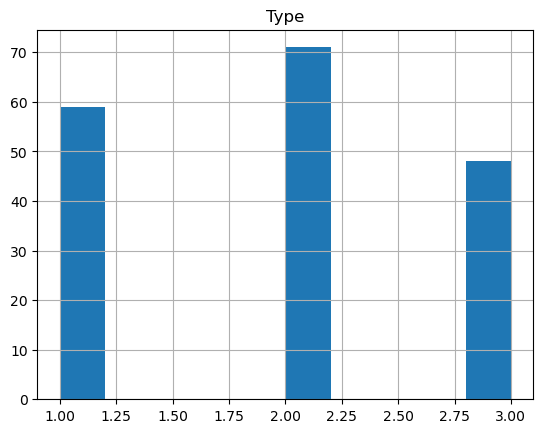

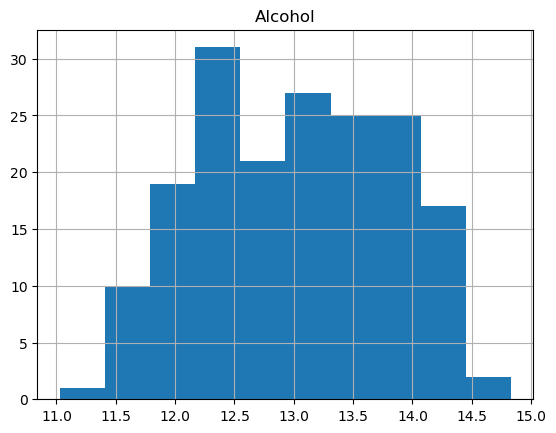

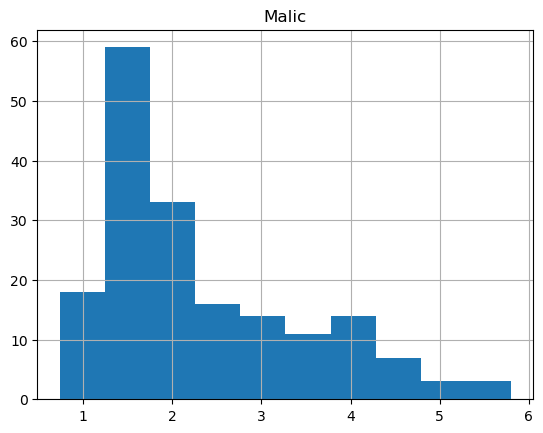

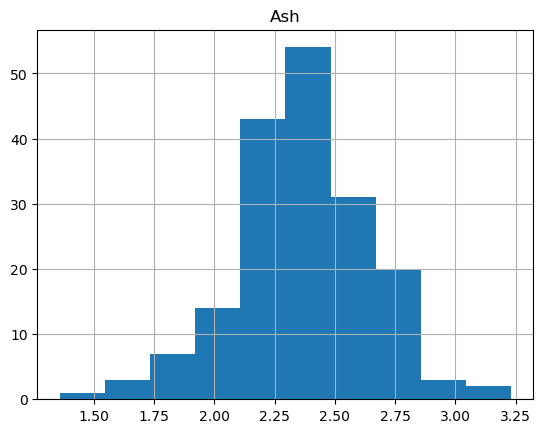

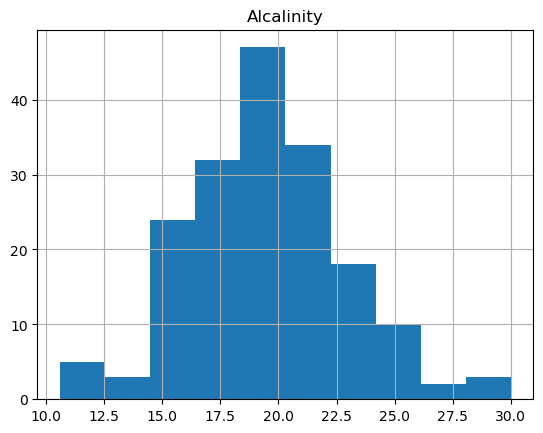

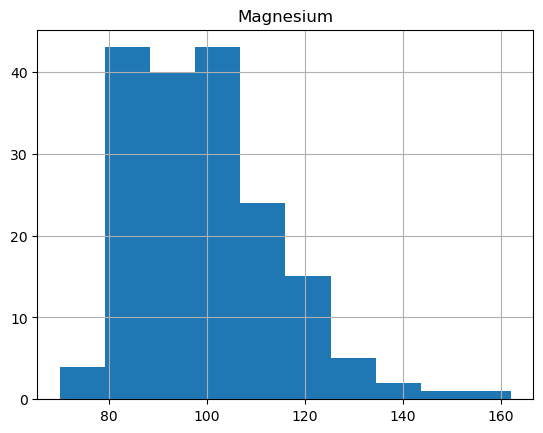

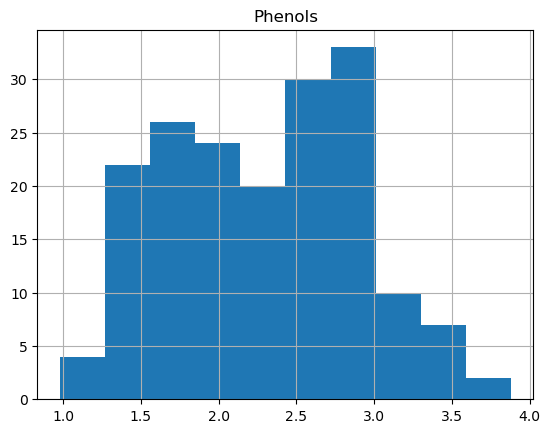

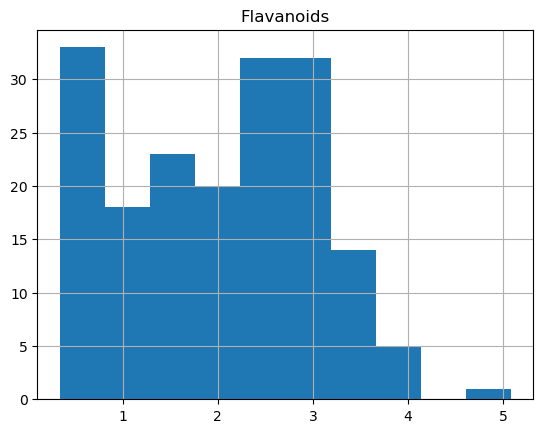

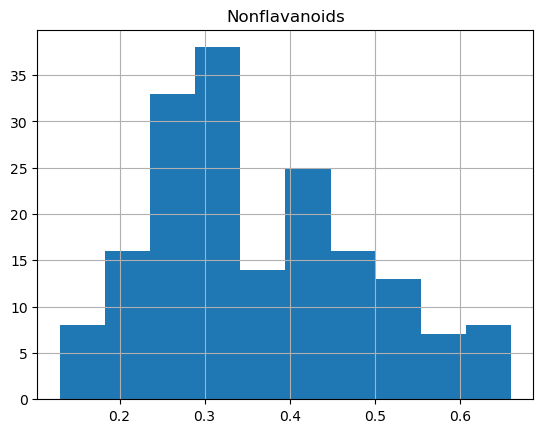

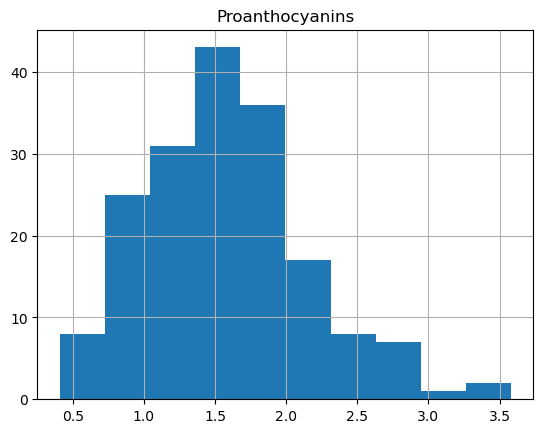

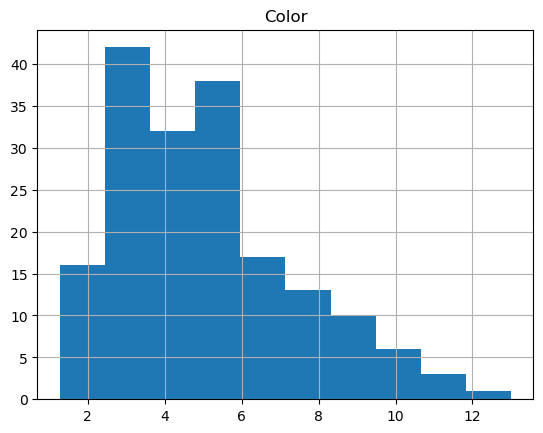

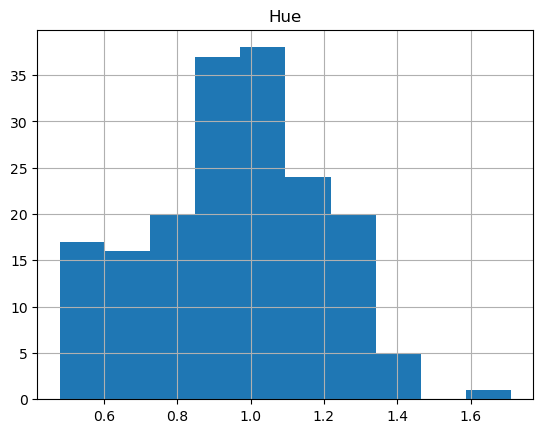

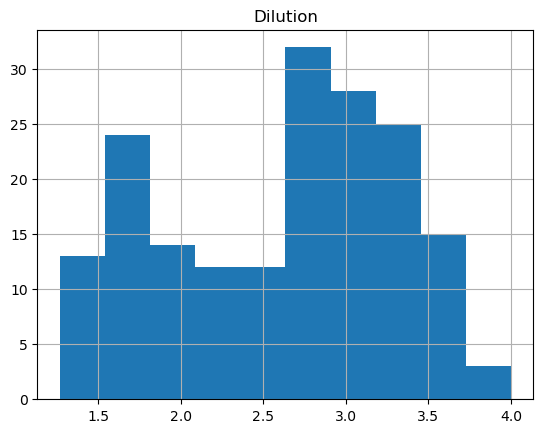

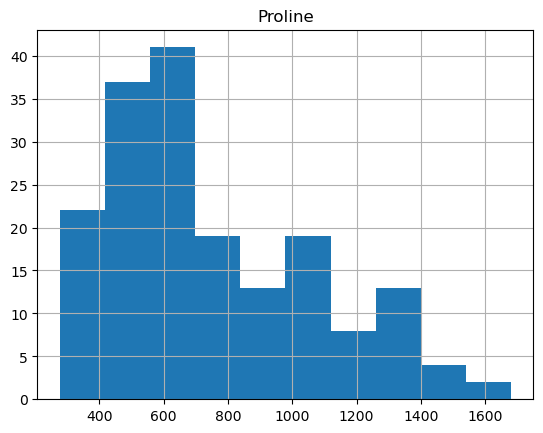

In [56]:
import matplotlib.pyplot as plt

for column in df.columns:
    df[column].hist()
    plt.title(column)
    plt.show()

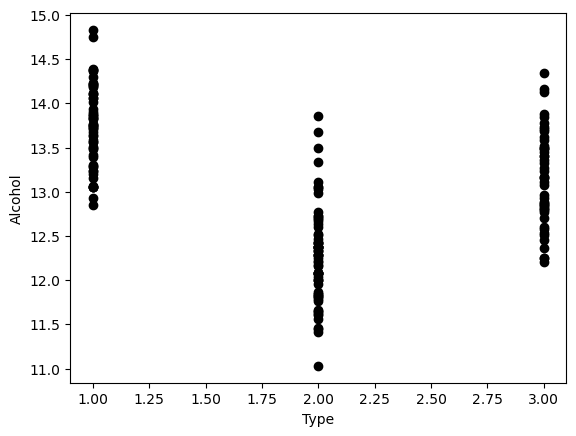

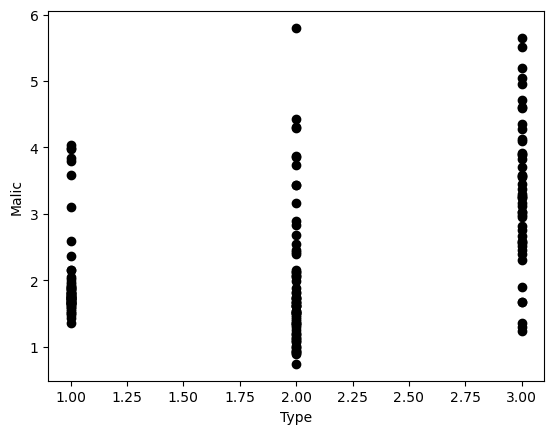

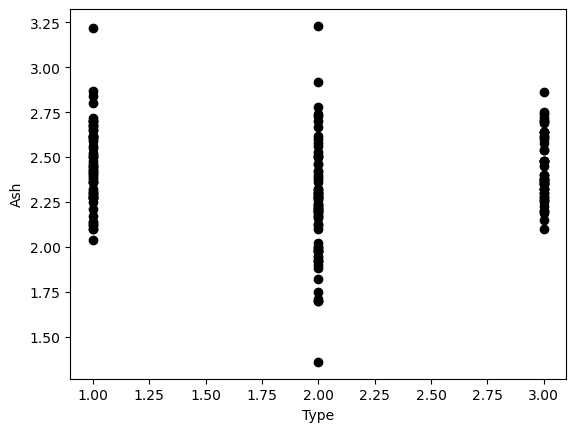

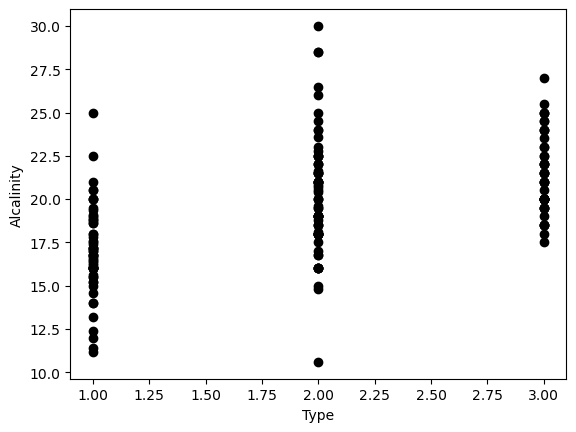

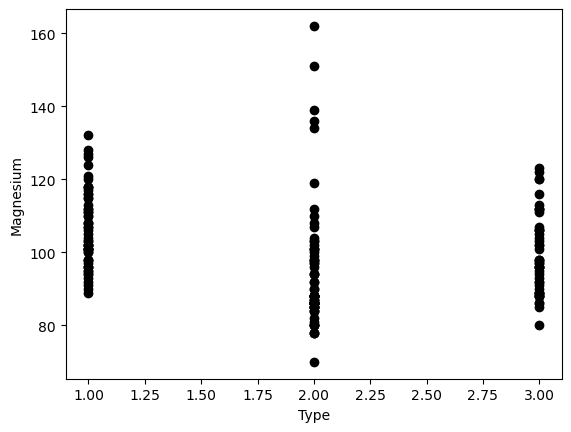

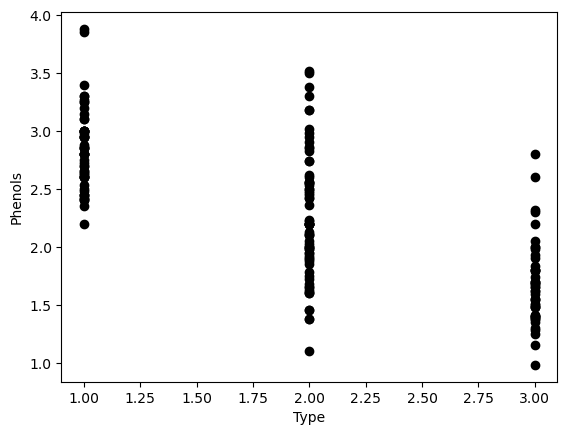

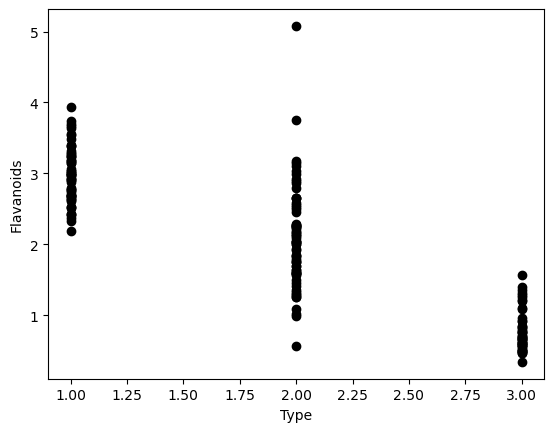

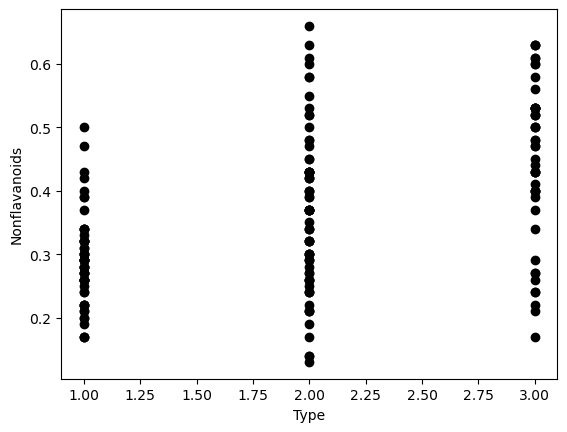

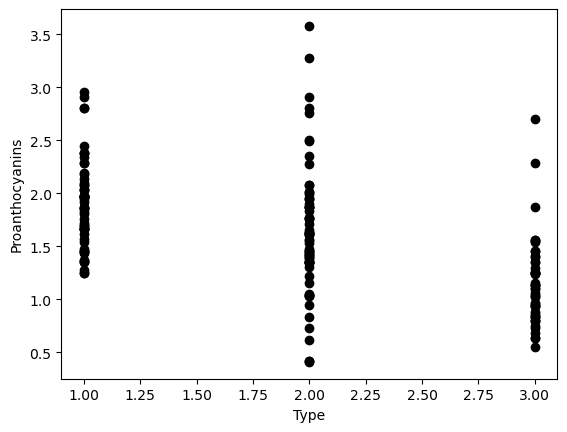

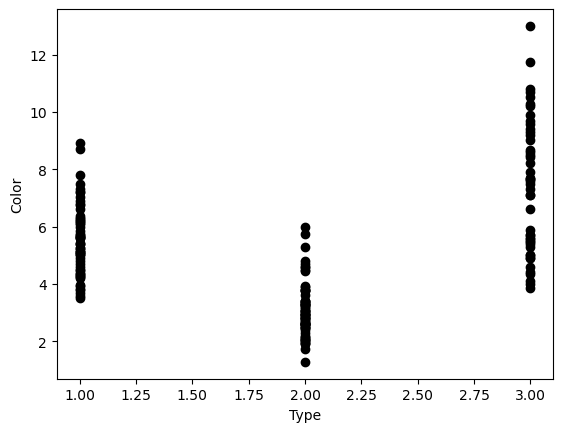

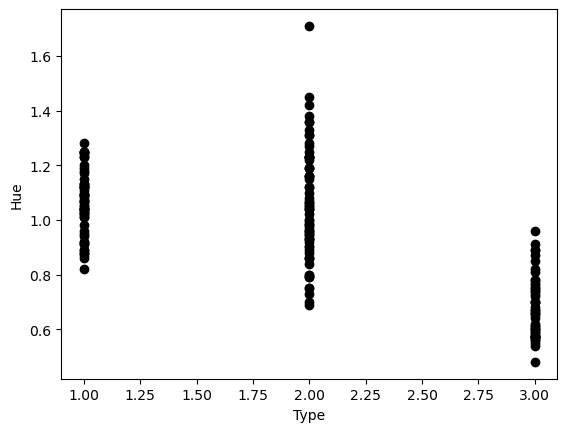

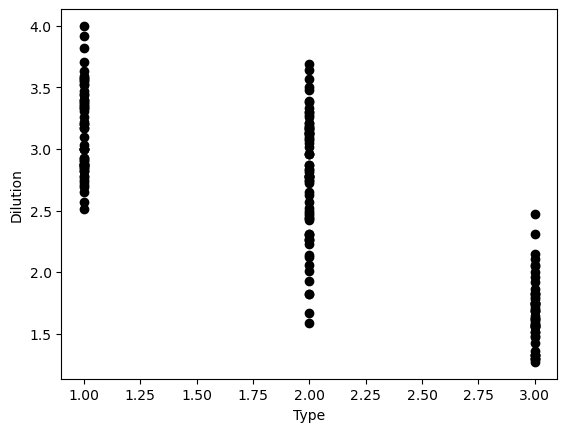

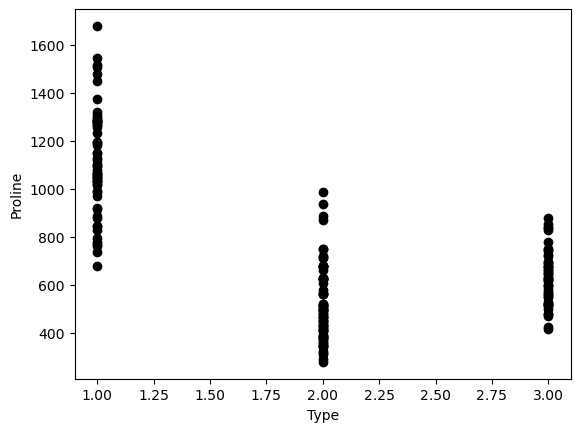

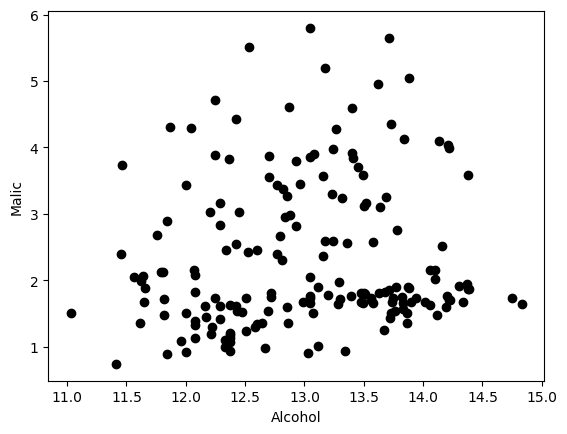

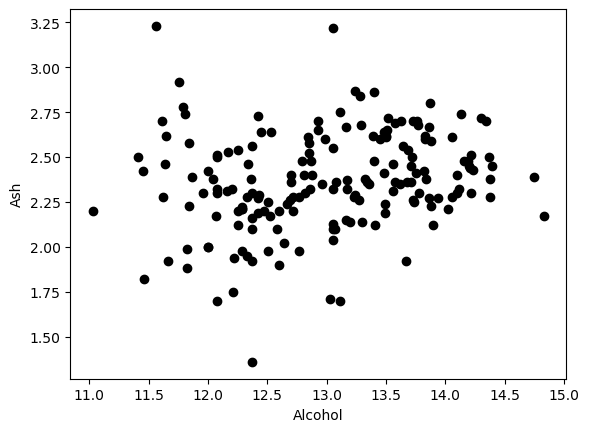

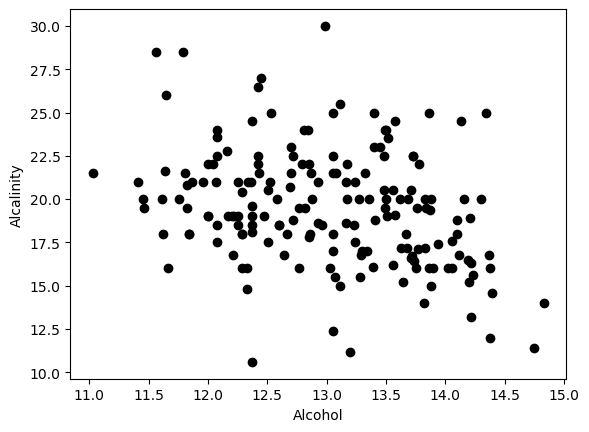

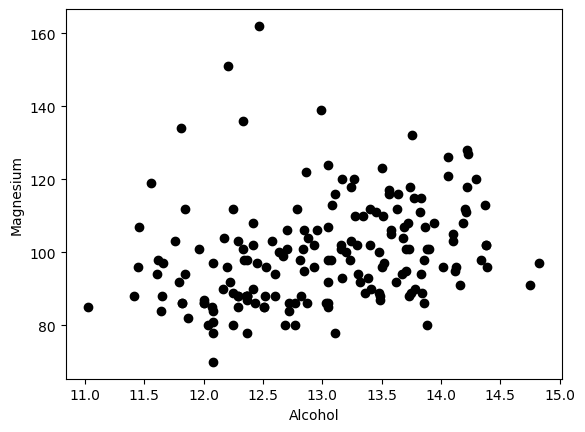

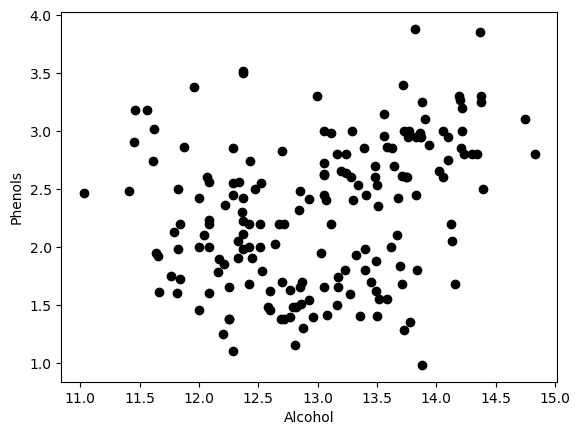

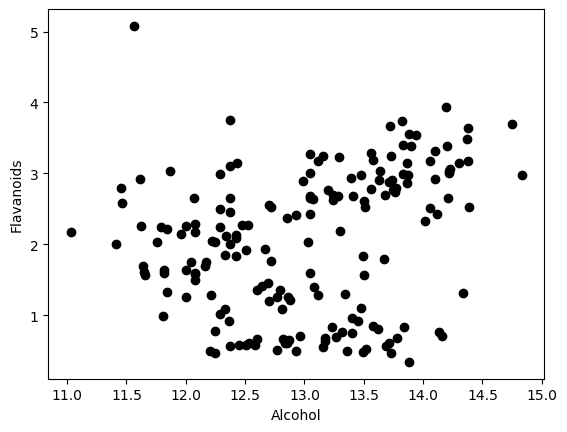

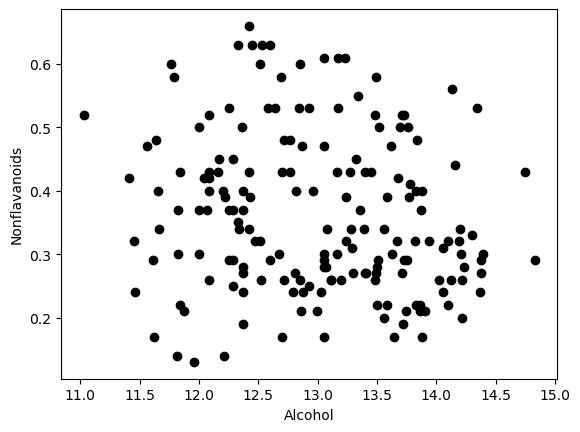

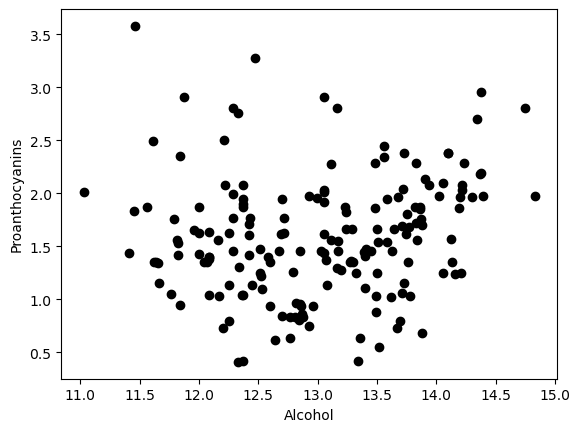

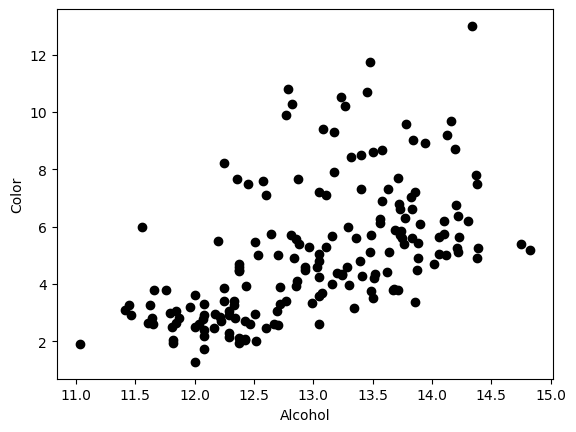

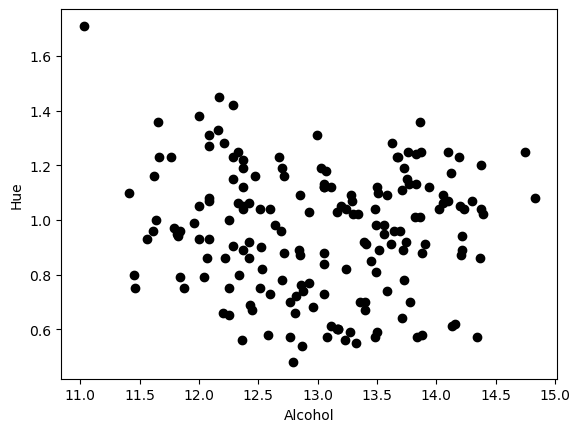

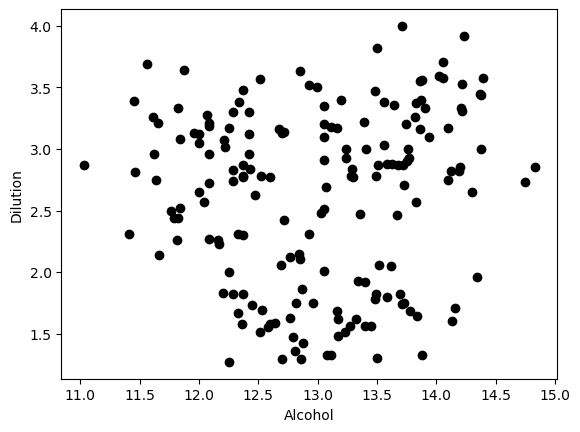

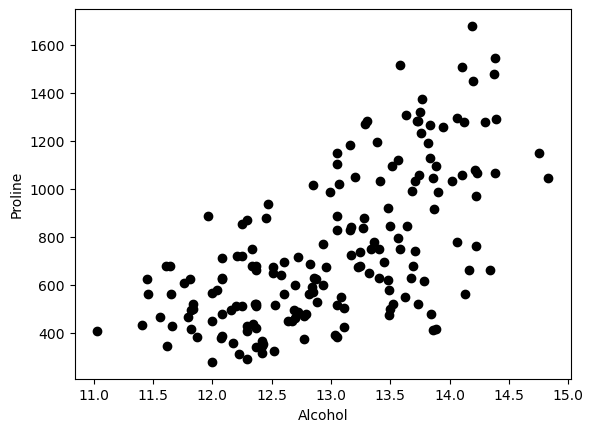

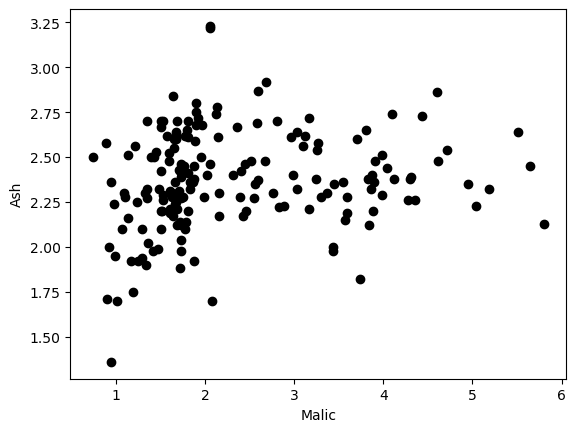

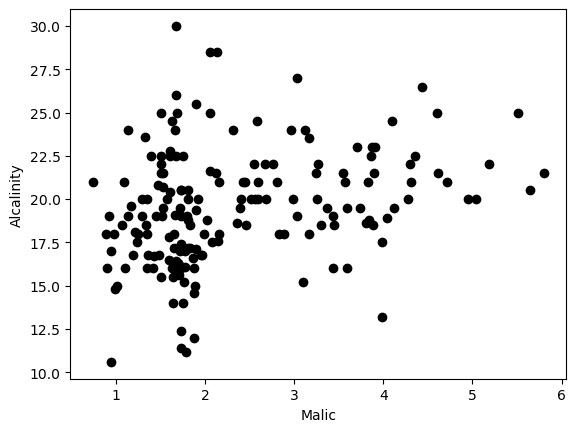

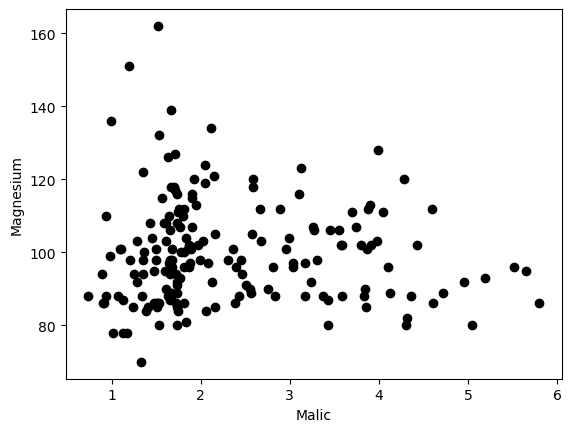

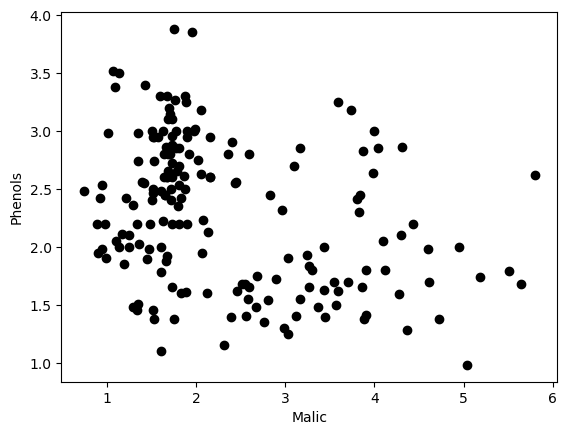

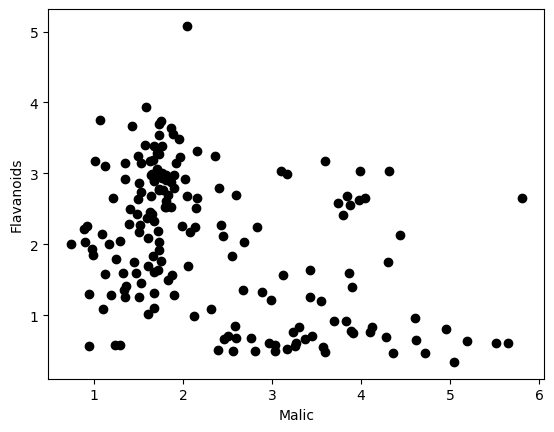

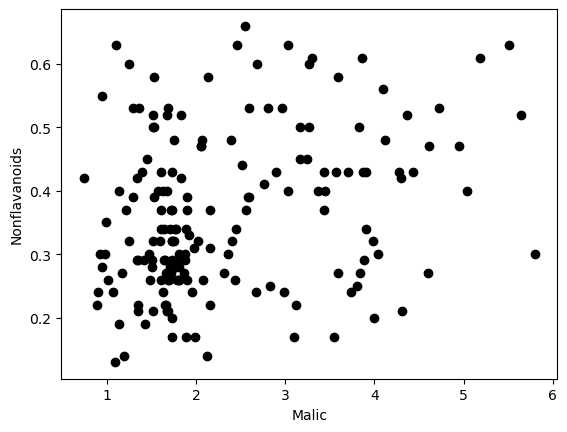

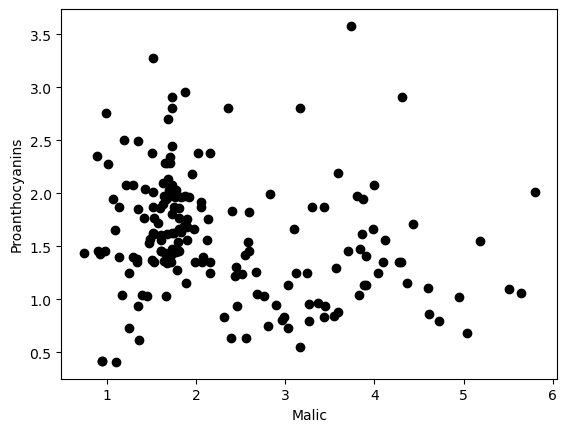

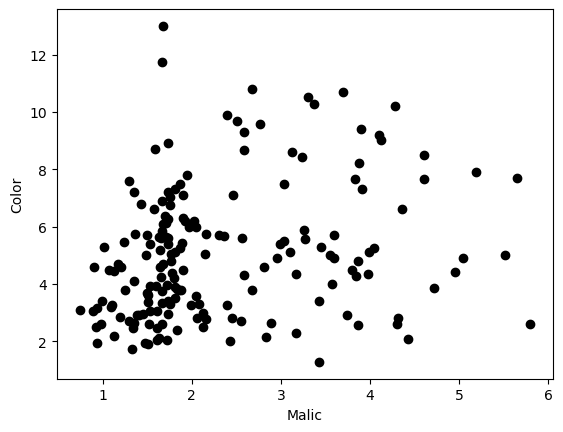

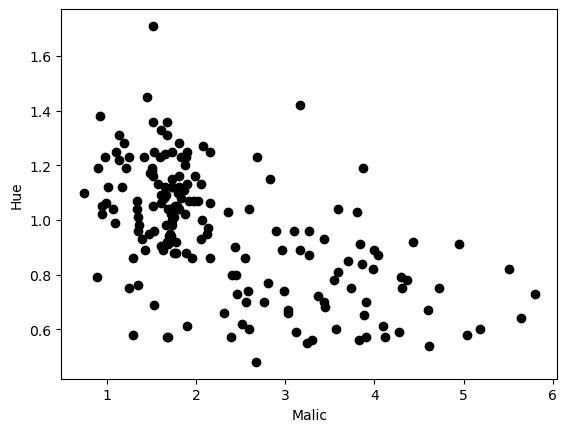

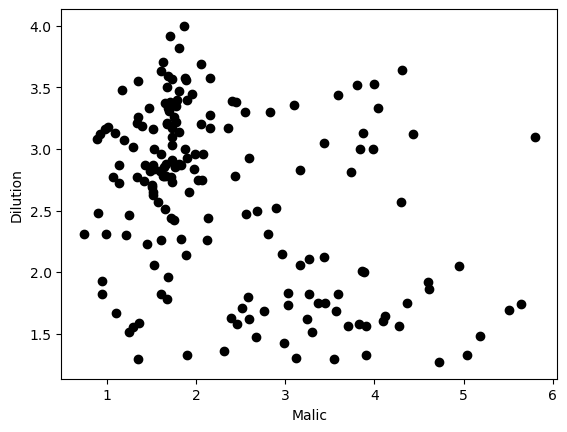

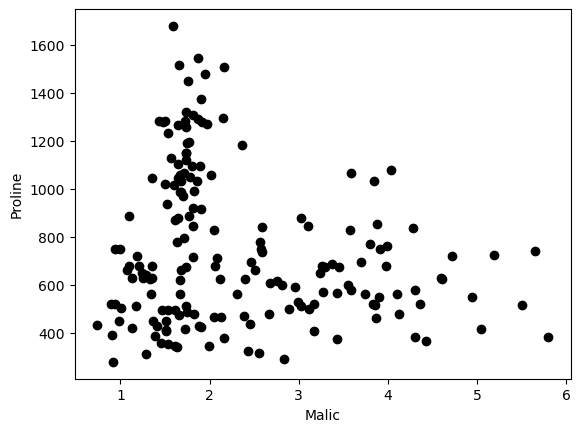

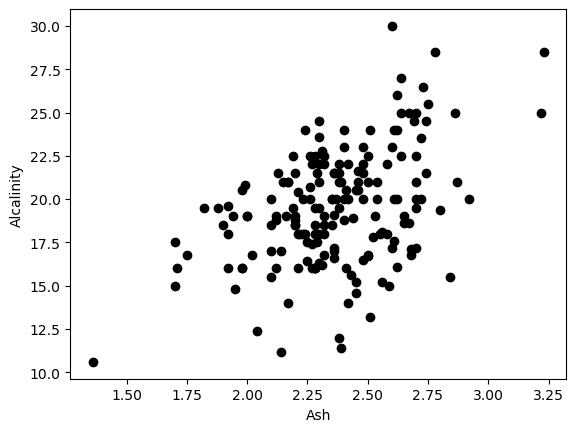

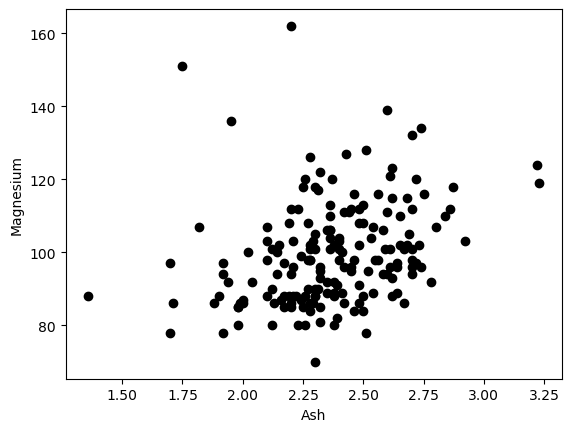

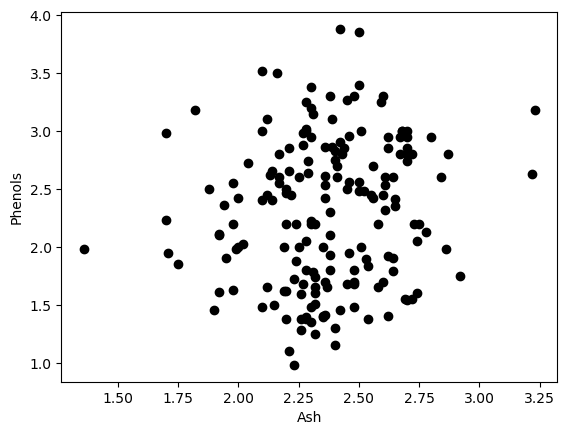

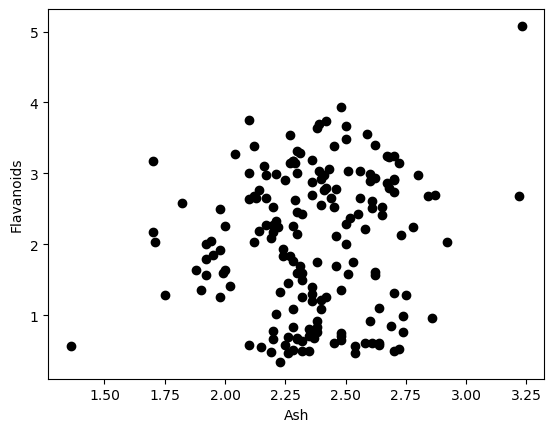

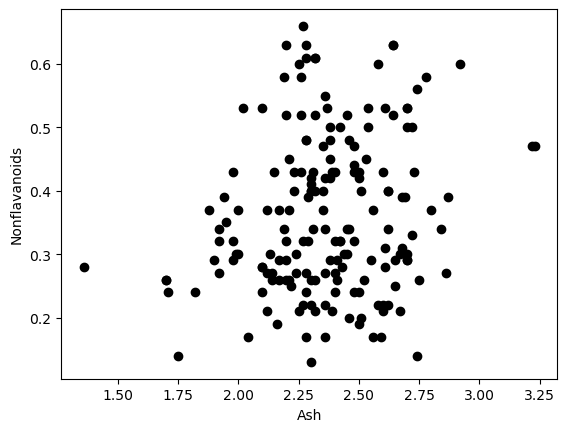

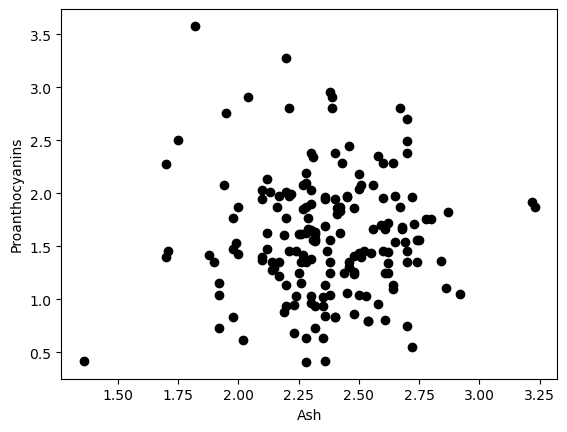

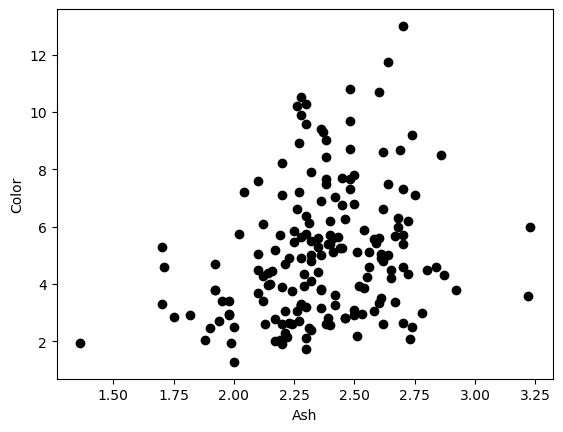

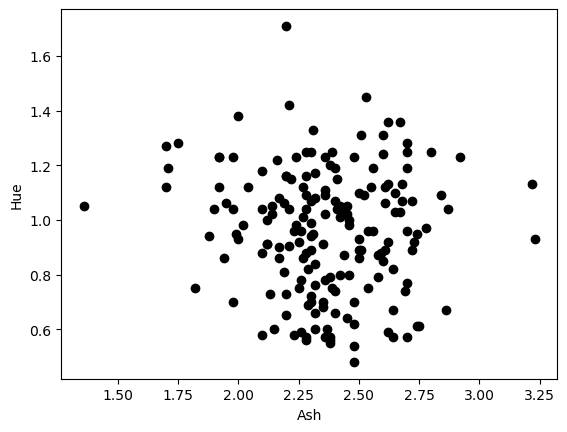

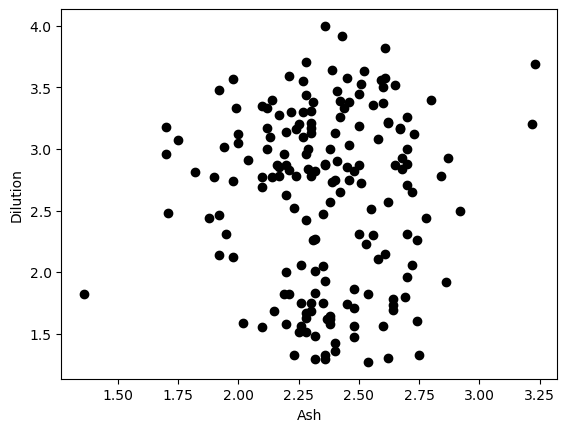

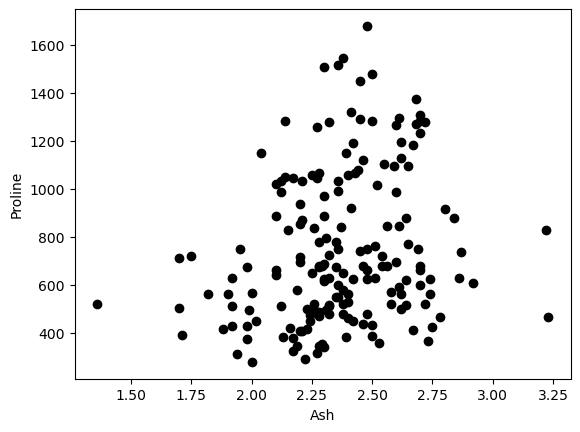

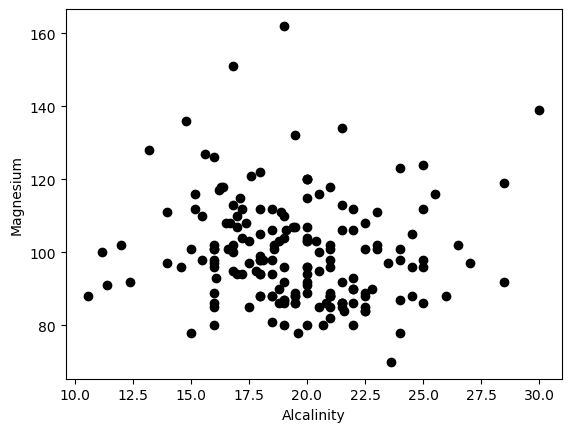

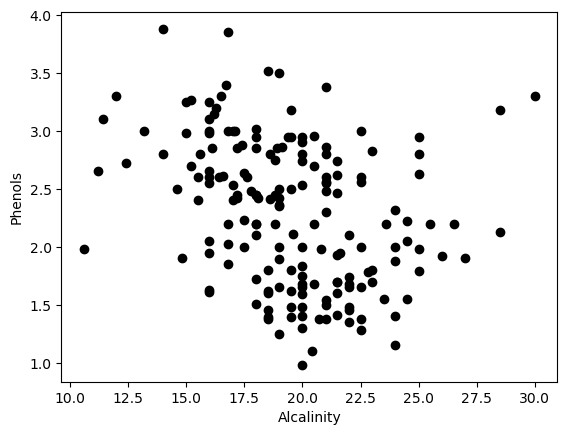

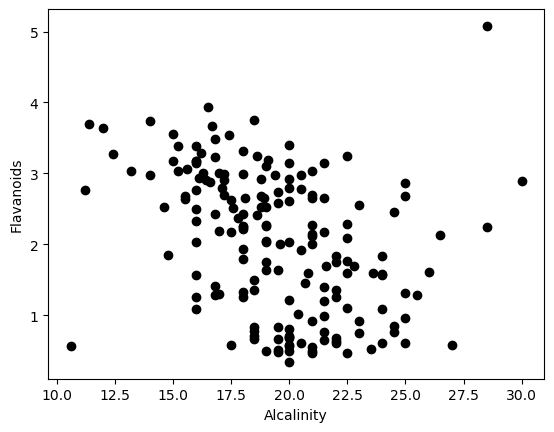

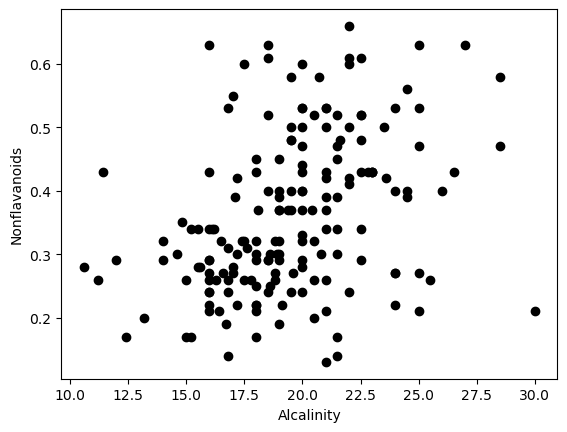

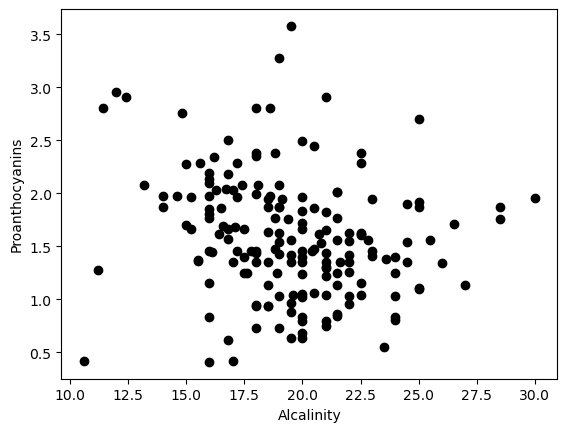

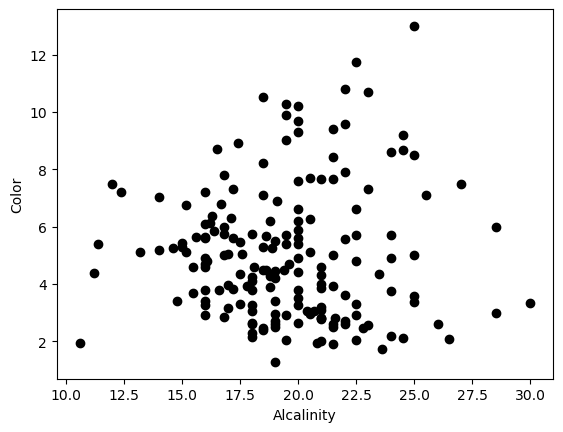

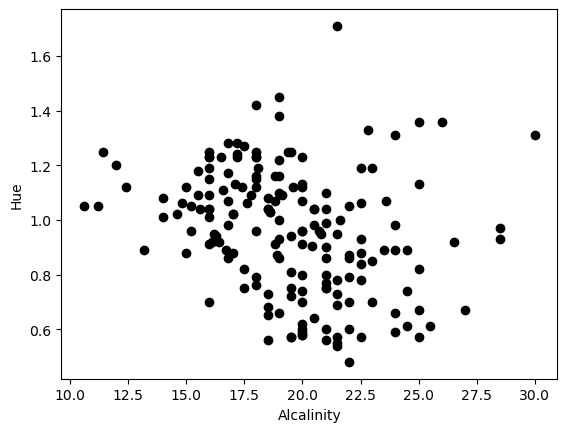

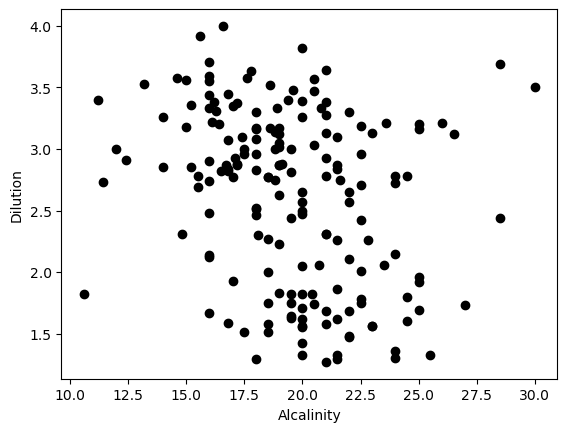

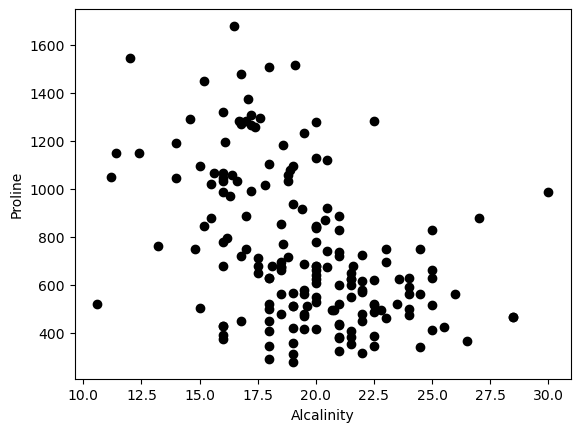

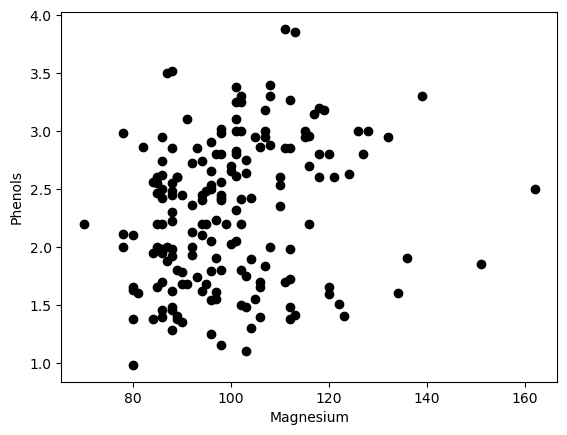

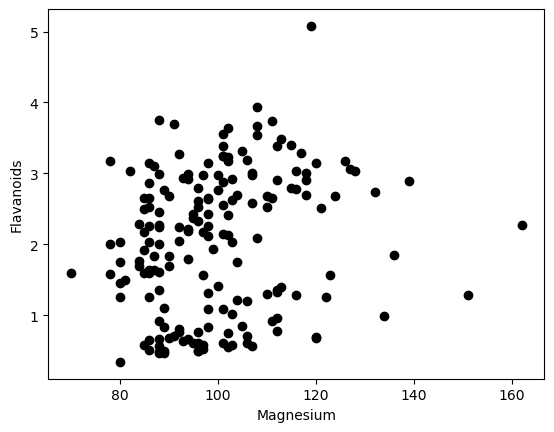

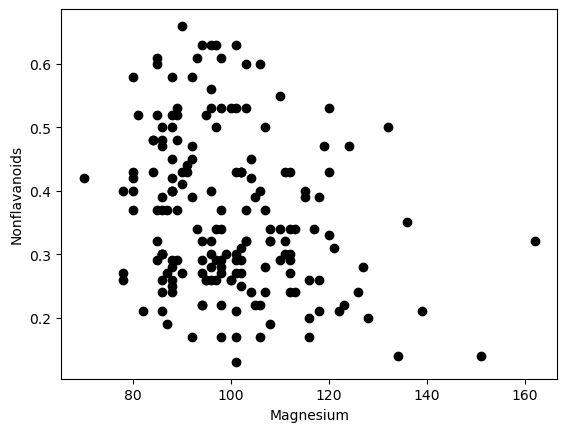

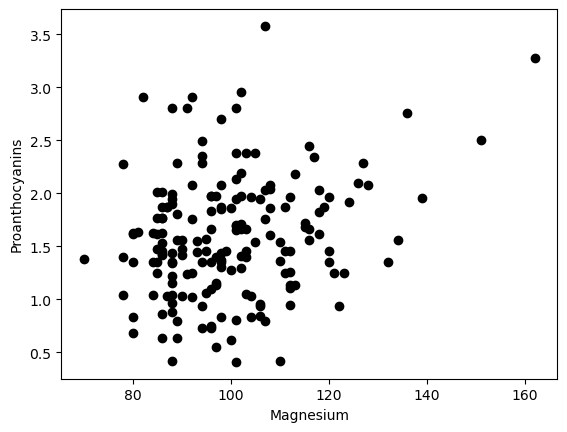

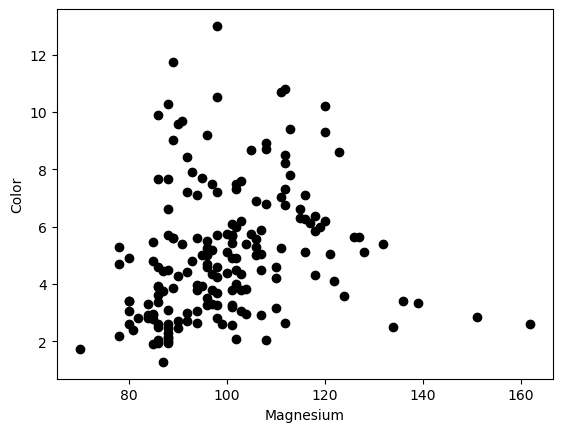

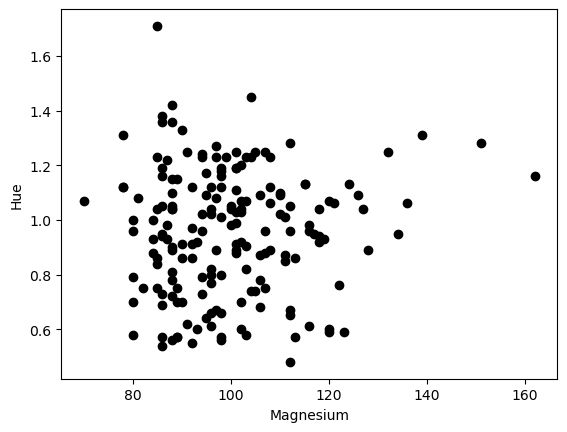

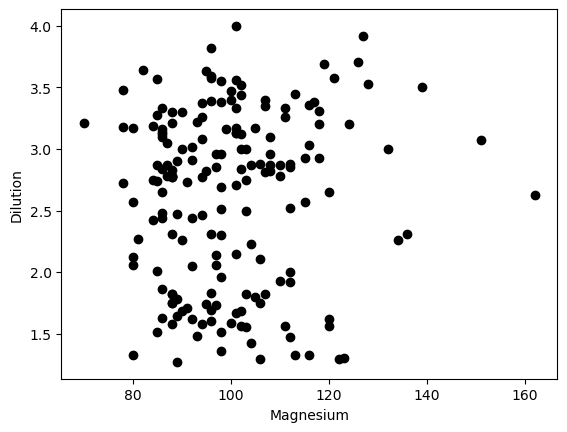

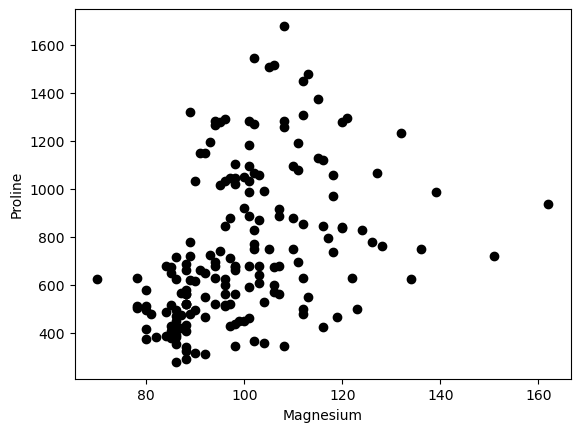

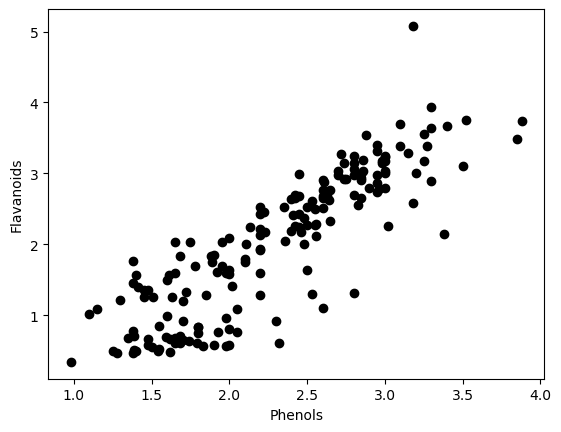

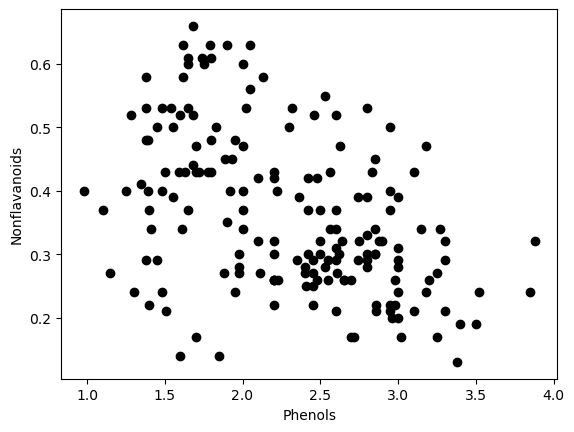

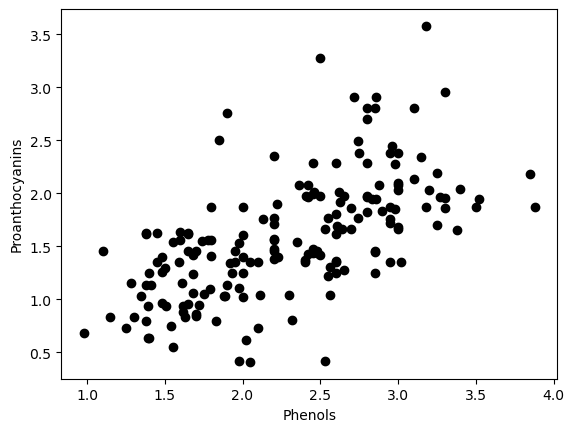

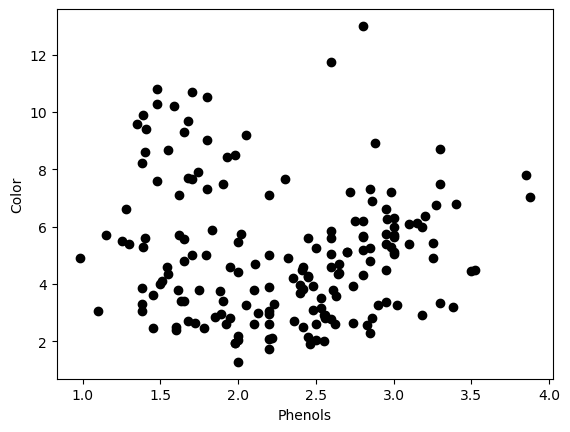

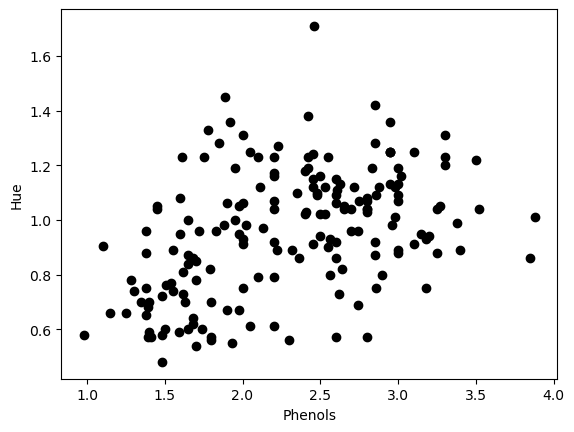

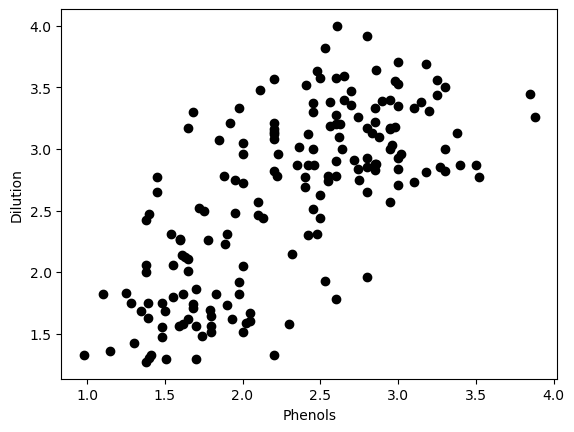

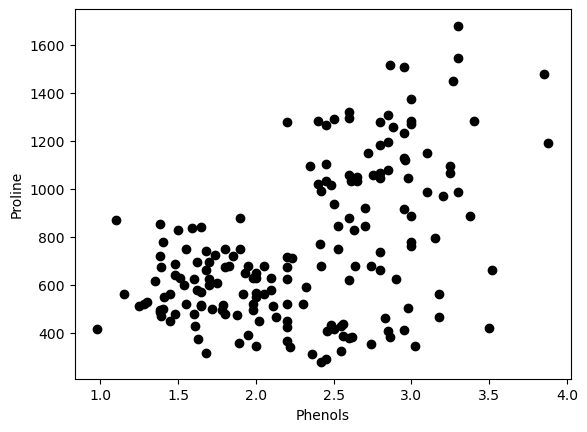

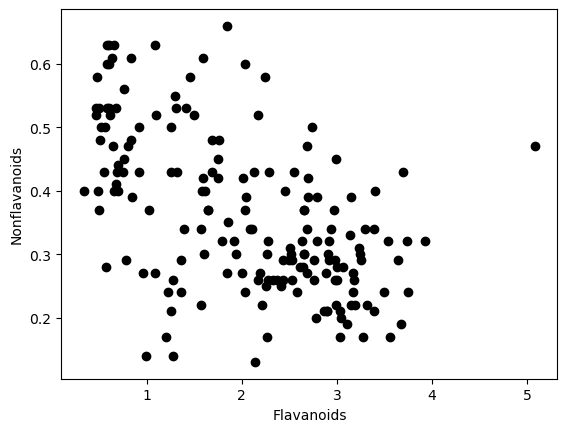

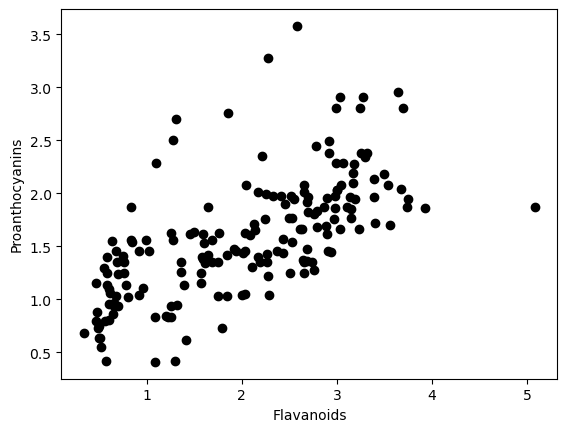

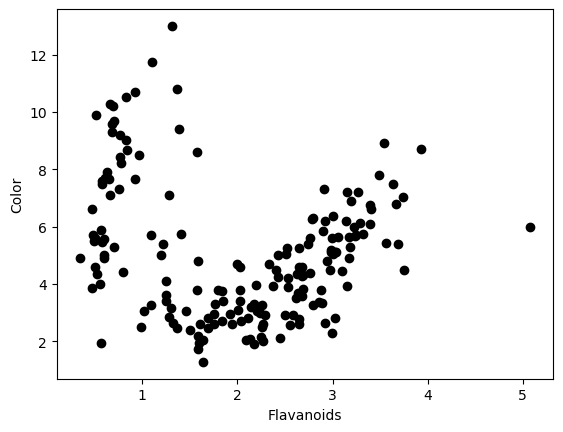

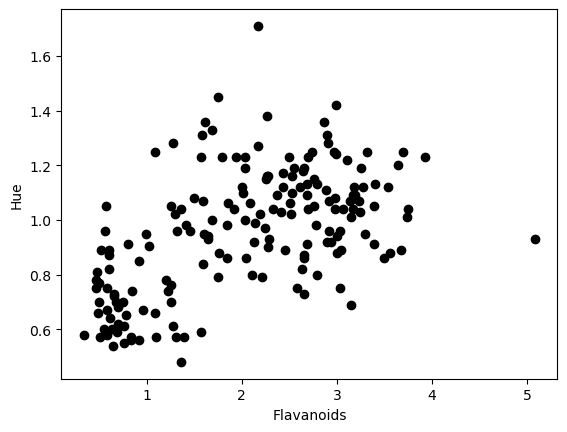

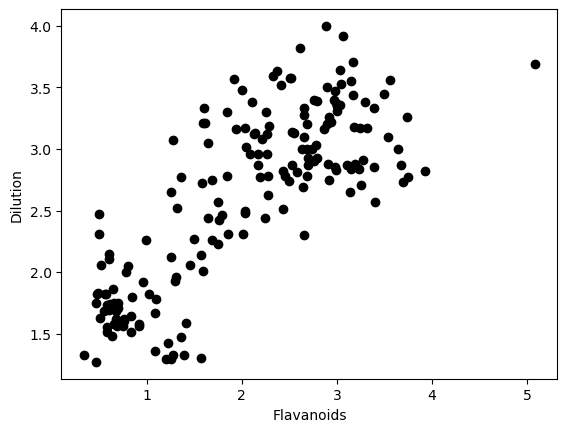

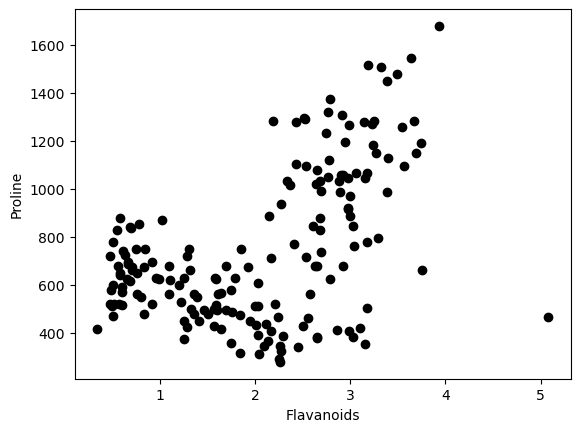

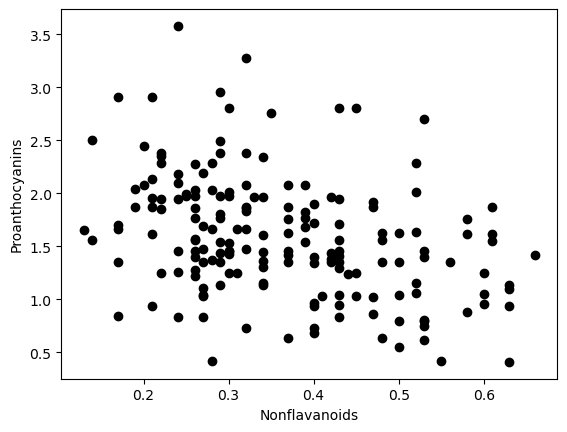

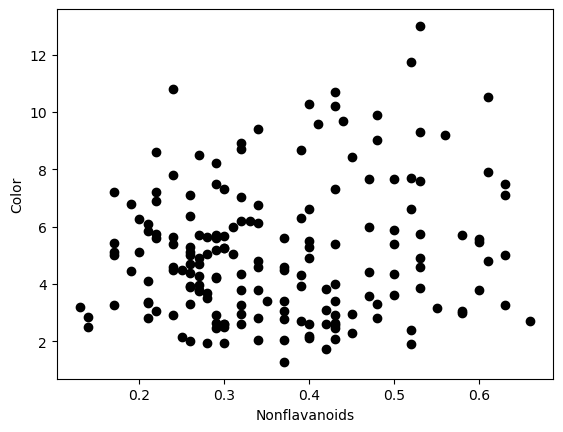

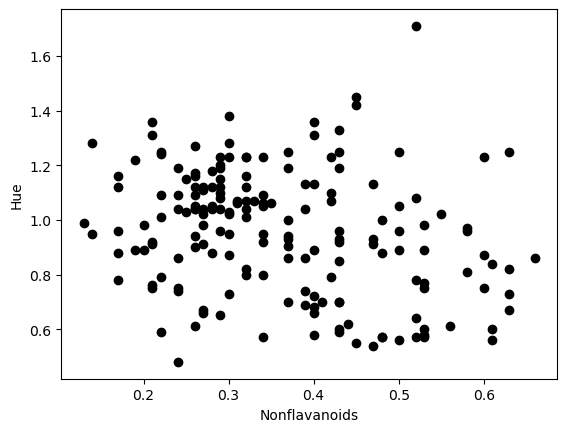

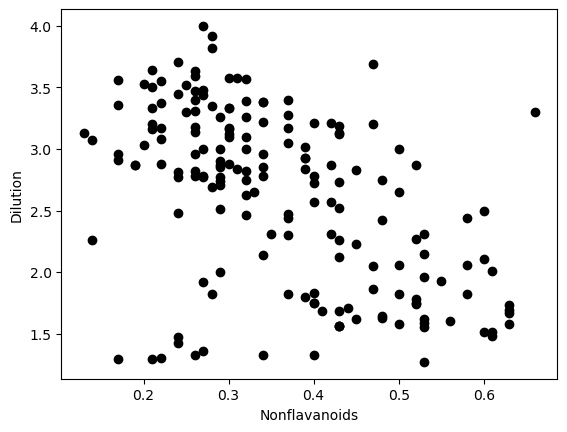

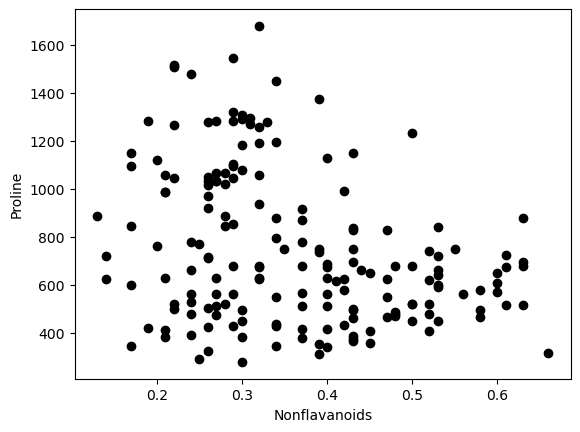

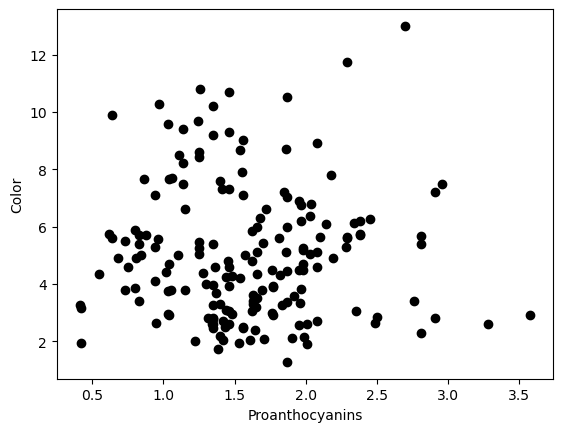

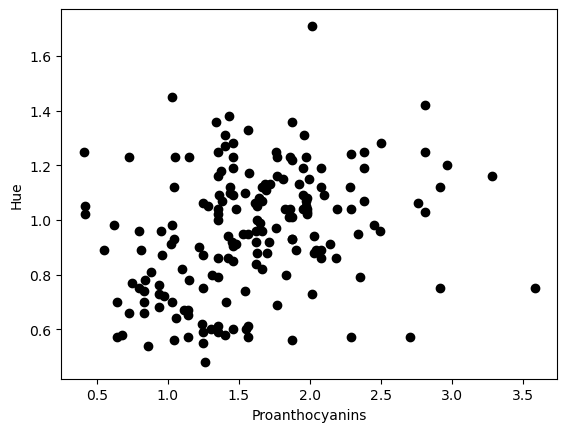

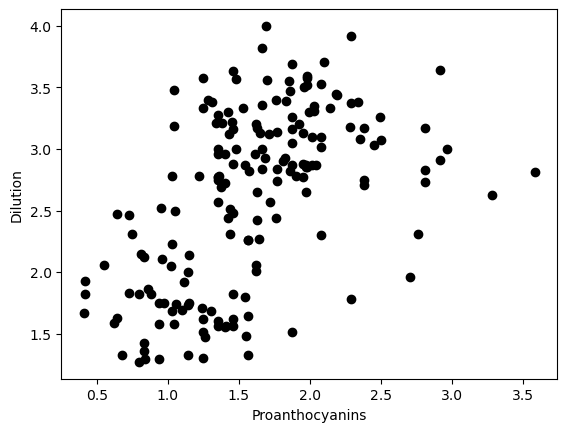

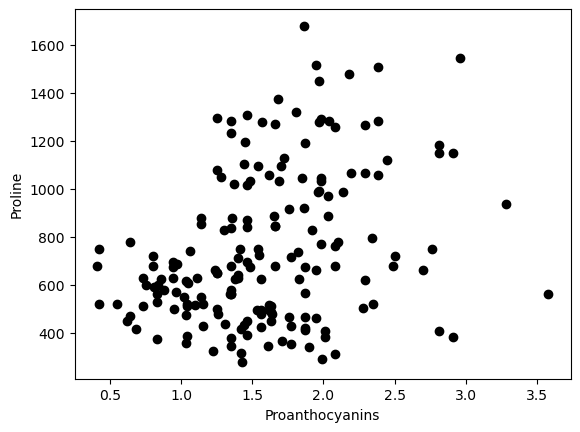

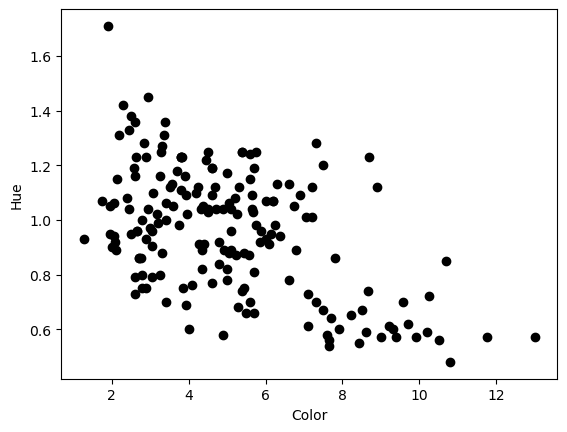

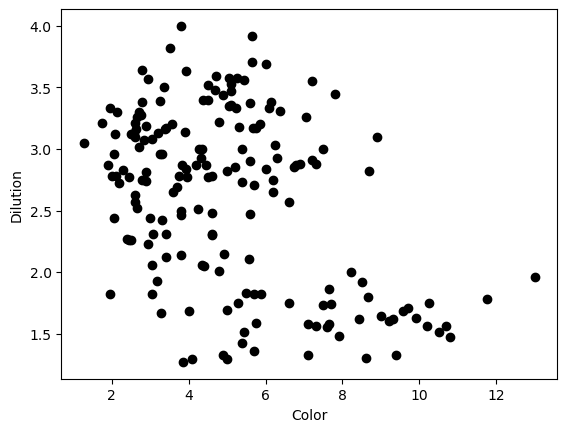

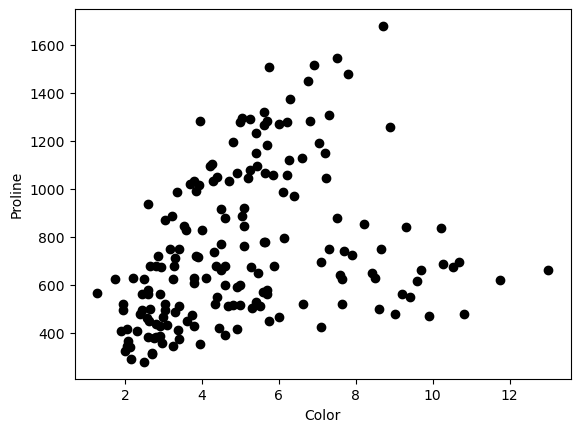

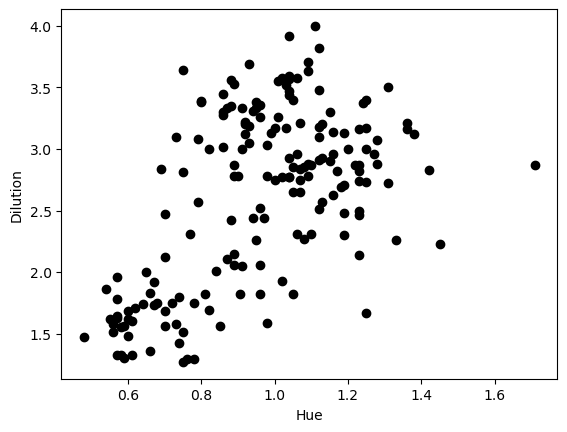

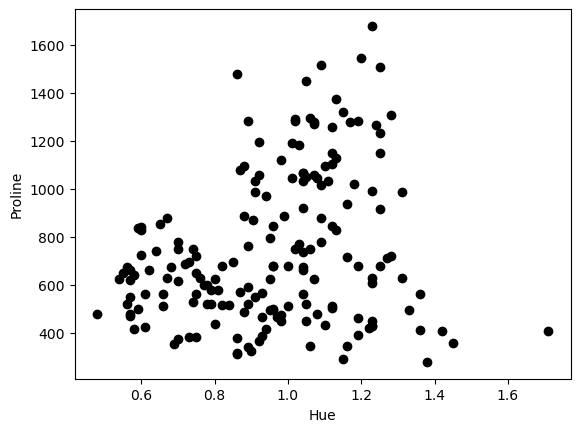

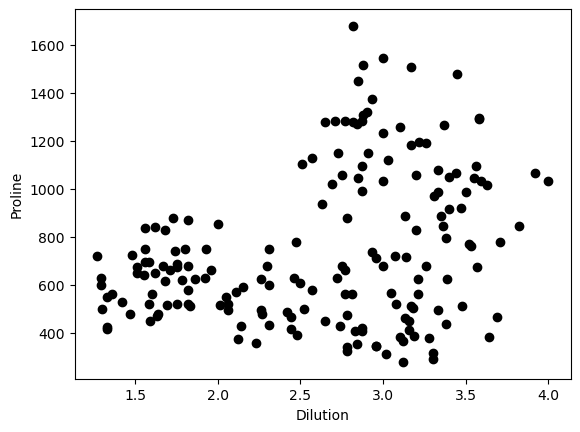

In [57]:
############# scatter plot ##################

for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        plt.scatter(df[df.columns[i]], df[df.columns[j]], color="black")
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

Type
0.1065236775609526


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


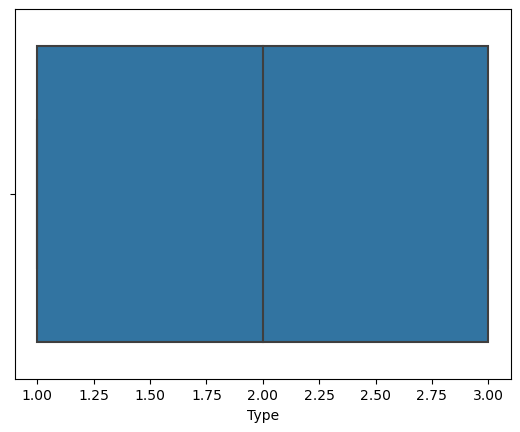

Alcohol
-0.05104747165391963


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


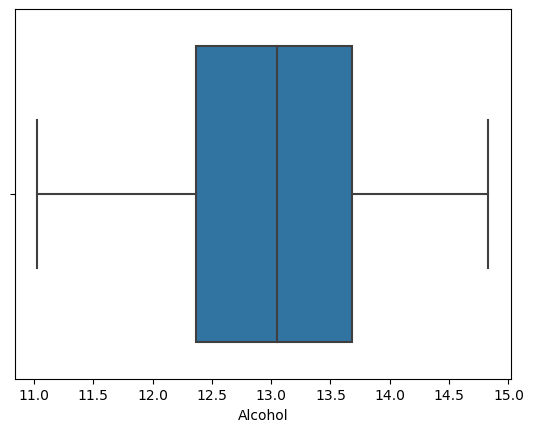

Malic
1.0308694978039965


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


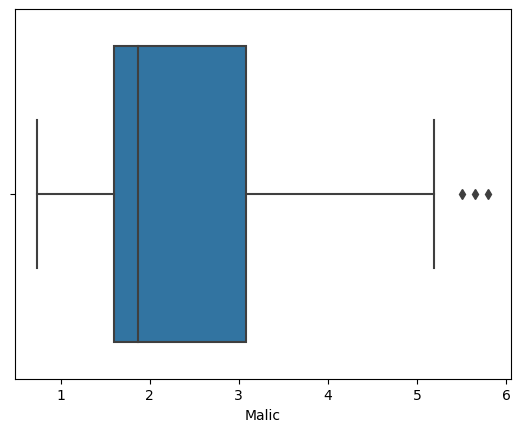

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Ash
-0.1752067779256028


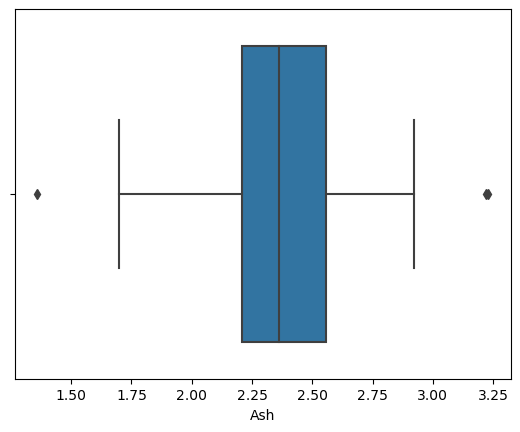

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Alcalinity
0.21124732832155219


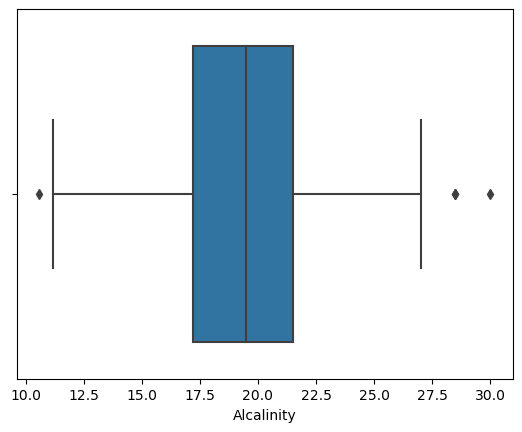

Magnesium
1.088914887210701


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


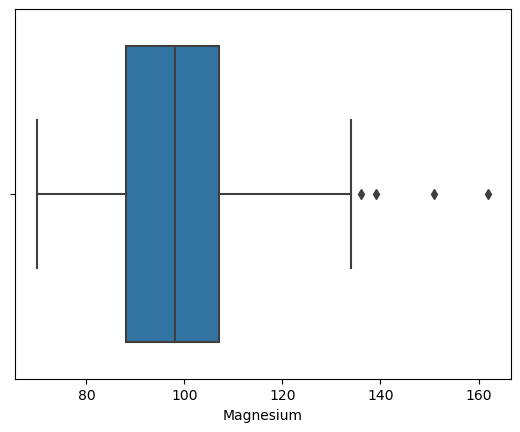

Phenols
0.08590677016719508


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


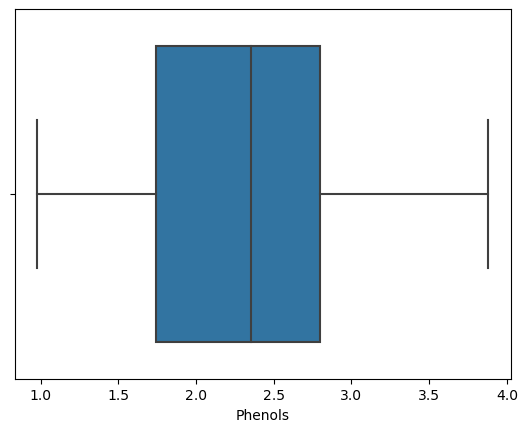

Flavanoids
0.025129482208428075


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


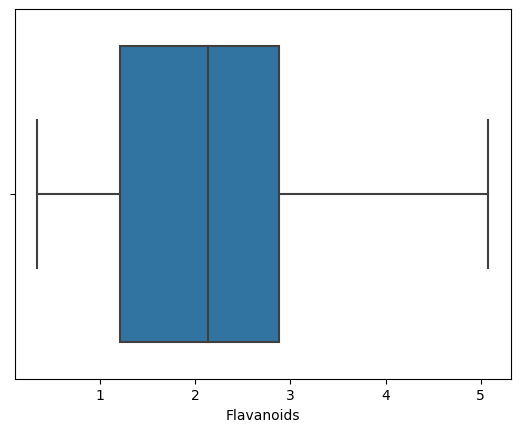

Nonflavanoids
0.44634901064702254


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


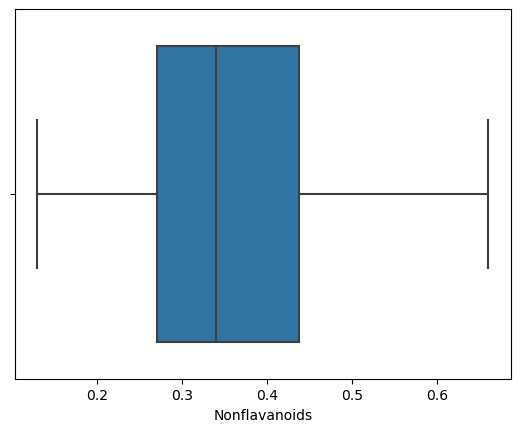

Proanthocyanins
0.5127690334109938


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


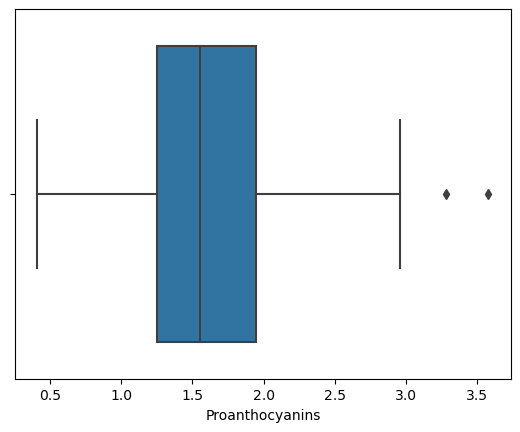

Color
0.8612480547740543


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


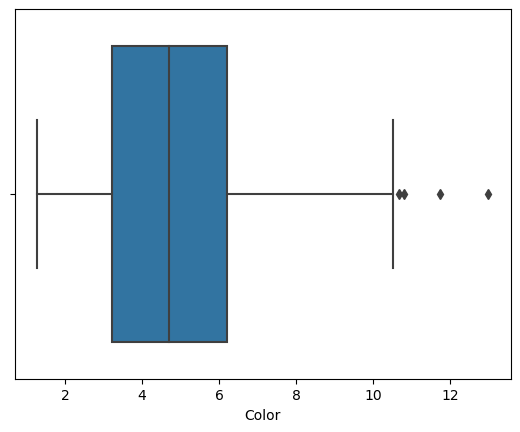

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Hue
0.020913119068882775


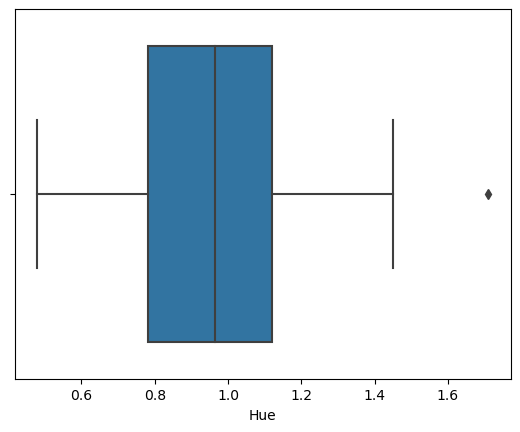

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Dilution
-0.30468992894361013


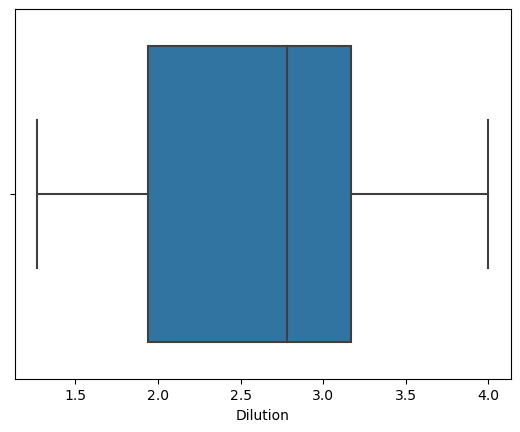

Proline
0.7613361671993626


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


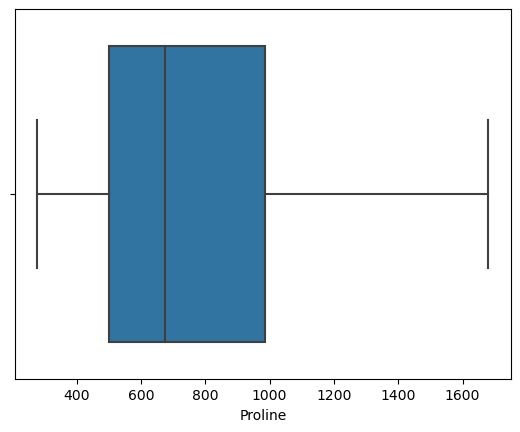

['Type',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

In [58]:

#################  box plot #########################

import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

list(df)


In [59]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    ls = df.index[(df[ft]<lower_bound) | (df[ft] > upper_bound)]
    return ls

In [60]:
index_list = []
for feature in ["Alcohol","Malic","Ash","Alcalinity","Magnesium","Phenols","Flavanoids","Nonflavanoids","Proanthocyanins","Color","Hue","Dilution","Dilution"]:
    index_list.extend(outliers(df,feature))
    
index_list
 

[123,
 137,
 173,
 25,
 59,
 121,
 59,
 73,
 121,
 127,
 69,
 73,
 78,
 95,
 95,
 110,
 151,
 158,
 159,
 166,
 115]

In [61]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df_cleaned = remove(df,index_list)
df_cleaned.shape


(161, 14)

In [62]:
##########    divide   X variable ############

X = df_cleaned.iloc[:,1:]


In [63]:
################# standard  scale ###############

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS

X = SS.fit_transform(X)
X


array([[ 1.49571092, -0.57112999,  0.27742496, ...,  0.37214873,
         1.82667765,  0.94743557],
       [ 0.20069843, -0.50414451, -0.92862453, ...,  0.41815299,
         1.09101548,  0.90097568],
       [ 0.15040669,  0.05087806,  1.27553489, ...,  0.32614447,
         0.76562644,  1.31911473],
       ...,
       [ 0.28870899,  1.88819414, -0.42956957, ..., -1.69804288,
        -1.51209683,  0.23505052],
       [ 0.16297962,  0.27097322,  0.02789748, ..., -1.65203863,
        -1.42721274,  0.25053715],
       [ 1.36998156,  1.71594576,  1.56665028, ..., -1.60603437,
        -1.45550744, -0.61671423]])

In [65]:
################################  PCA #################################

from sklearn.decomposition import PCA
pca = PCA()
pcs = pca.fit_transform(X)
d3 = pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

import numpy as np
import pandas as pd
newdata = pd.DataFrame(data = pcs,columns = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13"])

list(df)

['Type',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

In [66]:
newdata.head()


P1        P2        P3        P4        P5        P6        P7  \
0  3.482298 -1.494604  0.133281 -0.171033  0.650584 -0.512913 -0.733783   
1  2.278164  0.375183 -1.873077 -0.672753  0.530476 -1.217015 -0.049324   
2  2.617118 -0.853663  1.096403  1.011562 -0.774119  0.599112 -0.542107   
3  3.925864 -2.593702 -0.084049  0.606078 -0.127045  0.448259  0.025408   
4  1.005790 -1.012622  2.495217 -0.158048  0.076871 -0.381717 -0.721718   

         P8        P9       P10       P11       P12       P13  
0  0.342958  0.698661 -1.153005 -0.346686  0.577219  0.119113  
1 -0.893003 -0.607114 -0.019412 -0.211693  0.278820 -0.083656  
2  0.510314 -1.015963 -0.279071 -0.036636  0.018194 -0.023631  
3 -0.985220  0.248230 -0.178757  0.496940 -0.272708  0.347859  
4  0.011061  0.403240  0.108898 -0.363212 -0.074594 -0.043187

In [68]:
d1 = {"var": pca.explained_variance_ratio_,"PCnames":["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13"]}

d1


{'var': array([0.38853448, 0.20487624, 0.09547051, 0.06919384, 0.05789018,
        0.04289108, 0.03510666, 0.0259047 , 0.02394086, 0.01980589,
        0.0175546 , 0.01308515, 0.00574581]),
 'PCnames': ['P1',
  'P2',
  'P3',
  'P4',
  'P5',
  'P6',
  'P7',
  'P8',
  'P9',
  'P10',
  'P11',
  'P12',
  'P13']}

In [69]:
t1 = pd.DataFrame(d1)
t1


var PCnames
0   0.388534      P1
1   0.204876      P2
2   0.095471      P3
3   0.069194      P4
4   0.057890      P5
5   0.042891      P6
6   0.035107      P7
7   0.025905      P8
8   0.023941      P9
9   0.019806     P10
10  0.017555     P11
11  0.013085     P12
12  0.005746     P13

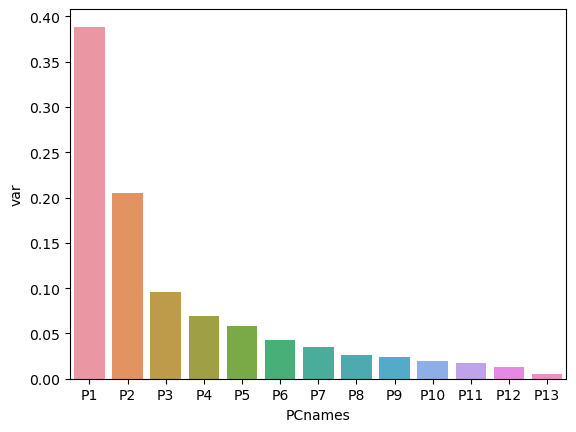

In [70]:
############# visuvalization #################

import seaborn as sns
sns.barplot(x = "PCnames", y = "var", data = t1);
plt.show()

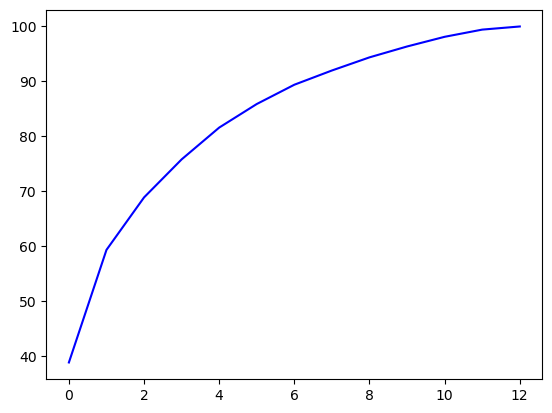

In [71]:
#########  First 3 PCS ############

d3 = np.cumsum(np.round(d3,decimals= 4)*100)
d3

plt.plot(d3,color="blue");
plt.show()

In [73]:
df1 = pd.concat([df_cleaned['Type'],pd.DataFrame(X[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
df1


Type       PC1       PC2       PC3
0     1.0  1.495711 -0.571130  0.277425
1     1.0  0.200698 -0.504145 -0.928625
2     1.0  0.150407  0.050878  1.275535
3     1.0  1.671732 -0.341465  0.568540
4     1.0  0.250990  0.270973  2.107293
..    ...       ...       ...       ...
127   NaN -0.251927  0.625039  1.026007
137   NaN  0.049823  1.524559 -0.013690
151   NaN -0.277073  1.017383 -0.263218
158   NaN  0.288709  1.888194 -0.429570
159   NaN  0.162980  0.270973  0.027897

[176 rows x 4 columns]

In [74]:
df1.isnull().sum()

Type    15
PC1     15
PC2     15
PC3     15
dtype: int64

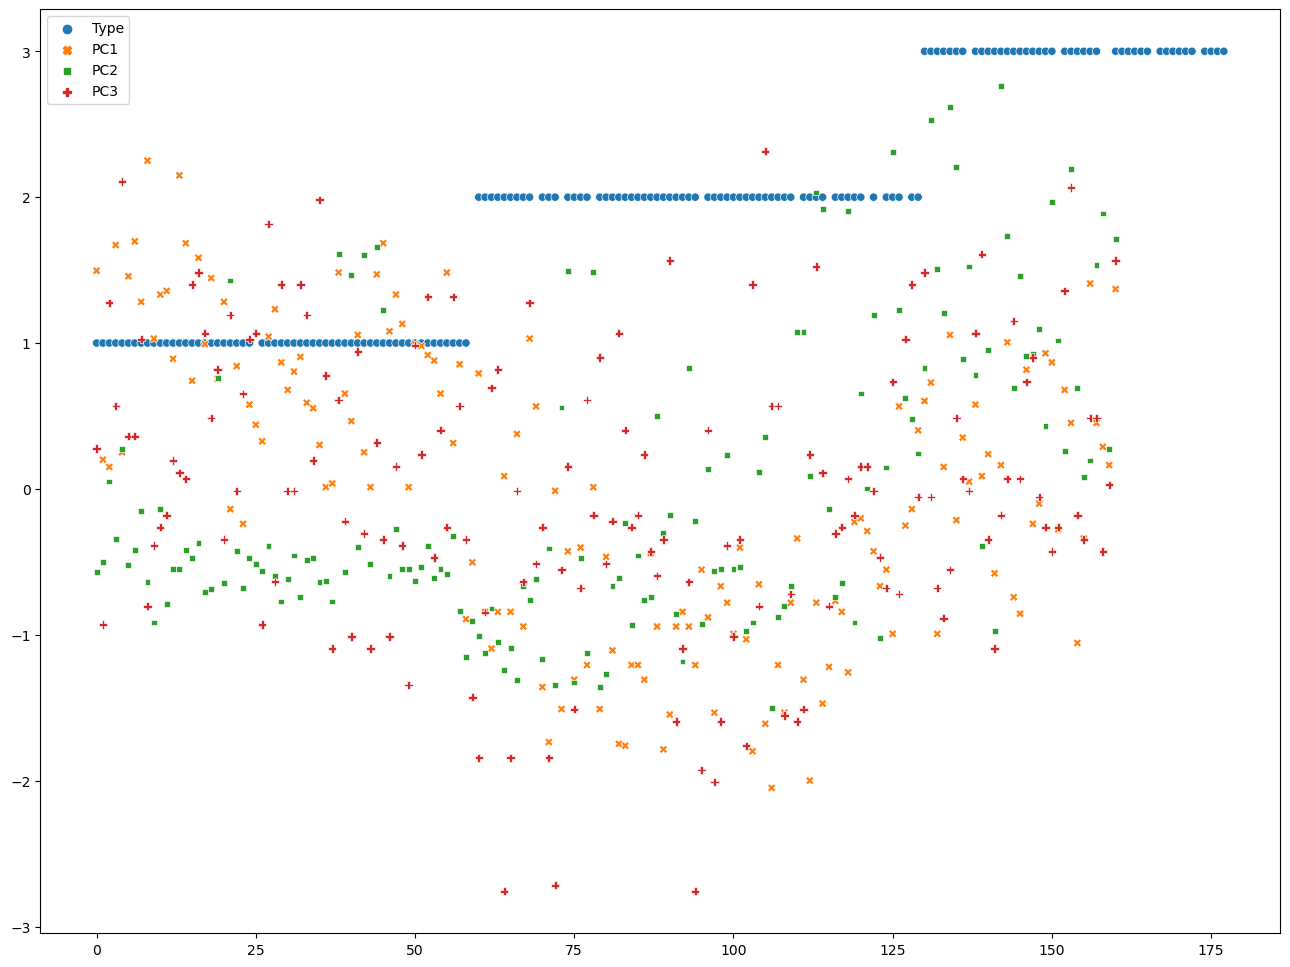

In [75]:
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=df1);
plt.show()


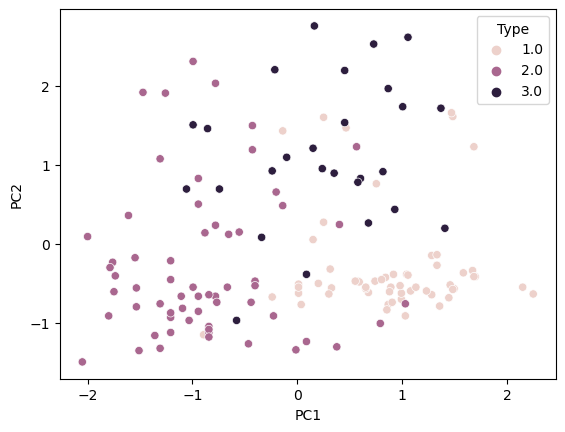

In [76]:
sns.scatterplot(data=df1, x='PC1', y='PC2', hue='Type');
plt.show()

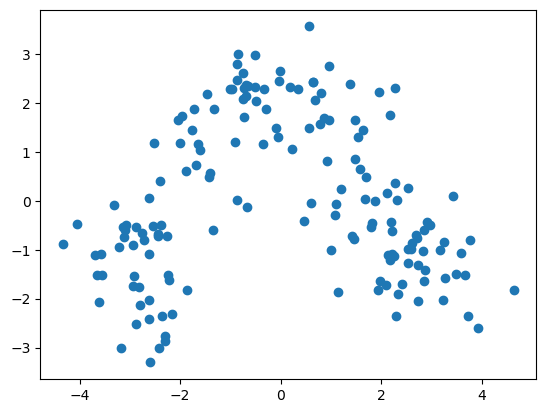

In [77]:
pcs[:,0:1]

x= pcs[:,0:1]
y= pcs[:,1:2]
plt.scatter(x,y);
plt.show()

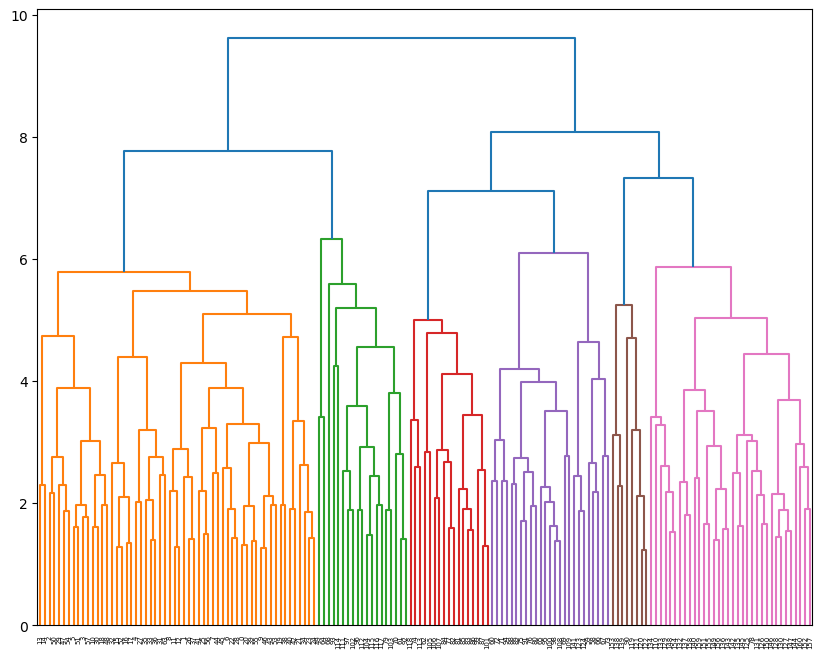

In [78]:
###########  Agglomeritive Clustering ###########

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(X,'complete'))
plt.show()

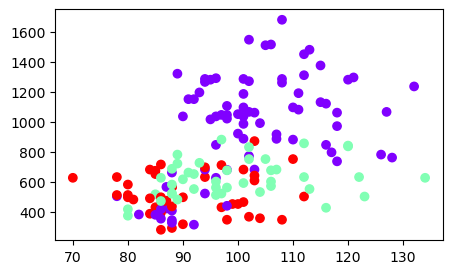

In [79]:
from  sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3,affinity = "euclidean",linkage = "complete")
cluster

Y = cluster.fit_predict(X)
Y_new = pd.DataFrame(Y)
Y_new[0].value_counts()

Y1 = df_cleaned.copy()
Y1['clustering']= cluster.labels_
Y1

Y1["clustering"].value_counts()



import numpy as np

plt.figure(figsize = (5,3))
plt.scatter(df_cleaned["Magnesium"],df_cleaned["Proline"],c = cluster.labels_,cmap = "rainbow")
plt.show()

In [80]:
###############   K means clustering ###################



from sklearn.cluster import KMeans

wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


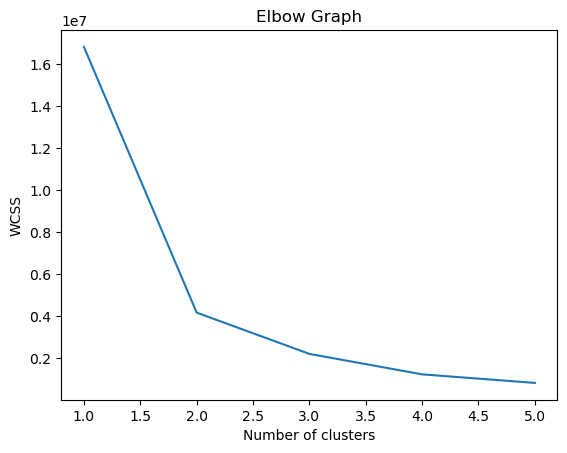

In [81]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');
plt.show()

In [82]:
clusters2=KMeans(3,random_state=30).fit(df_cleaned)
clusters2

clusters2.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1])

In [83]:

df2 = df_cleaned.copy()
df2['clusters2id']=clusters2.labels_
df2

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
172     3    14.16   2.51  2.48        20.0         91     1.68        0.70   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
172           0.44             1.24   9.70  0.62      1.71      660   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     clusters2id  
0              2  
1              2  
2              2  
3              2  
4              0  
..           ...  
172            0  
174            0  
175            0  
176            0  
177            1  

[161 rows x 15 columns]

In [85]:
df2['clusters2id'].value_counts()

1    60
0    55
2    46
Name: clusters2id, dtype: int64